# Data Filtering via Constraints

In [1]:
import pandas as pd

try:
    df = pd.read_csv('finally_Cline.csv', encoding='utf-8')
except pd.errors.ParserError as e:
    print("ParserError:", e)
except FileNotFoundError:
    print("File not found. Please double-check the file path.")

df.head(5)

C:\Users\erend\AppData\Local\Temp\ipykernel_9880\2779105325.py:4: DtypeWarning: Columns (33,34,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('finally_Cline.csv', encoding='utf-8')


,NLSituationNumber,DateFileStart,DateFileEnd,TimeFileStart,TimeFileEnd,FileSeverity,AvgLength,FileDuration,HectometerHead,HectometerTail,...,Visibility,CloudCover,Humidity,Weather,WeatherCode,Fog,Rain,Snow,Thunder,IceFormation
0,0.0,2019-01-02,2019-01-02,09:00:00,09:00:00,0,0,0,0,0,...,65,8,83,23,7,0,1,0,0,0
1,0.0,2019-01-02,2019-01-02,14:00:00,14:00:00,0,0,0,0,0,...,75,4,61,,5,0,0,0,0,0
2,0.0,2019-01-02,2019-01-02,15:00:00,15:00:00,0,0,0,0,0,...,73,1,67,,5,0,0,0,0,0
3,0.0,2019-01-02,2019-01-02,16:00:00,16:00:00,0,0,0,0,0,...,71,3,72,,5,0,0,0,0,0
4,0.0,2019-01-02,2019-01-02,17:00:00,17:00:00,0,0,0,0,0,...,69,7,78,,5,0,0,0,0,0


In [2]:
df.dtypes

NLSituationNumber        float64
DateFileStart             object
DateFileEnd               object
TimeFileStart             object
TimeFileEnd               object
FileSeverity              object
AvgLength                 object
FileDuration              object
HectometerHead            object
HectometerTail            object
RouteNumber              float64
HectometerDirection       object
HeadSegmentFrom           object
HeadSegmentTo             object
TrajectoryFrom            object
TrajectoryTo              object
CauseGroundDetail         object
CauseCode                 object
Hour                      object
Station                    int64
Date                      object
WindDirection              int64
WindSpeedAvg               int64
WindSpeed                  int64
WindGust                   int64
Temperature                int64
MinTemp10cm               object
DewPoint                   int64
SunshineDuration           int64
GlobalRadiation            int64
Precipitat

In [3]:
# Convert relevant columns to datetime
df['DateFileStart'] = pd.to_datetime(df['DateFileStart'])
df['DateFileEnd'] = pd.to_datetime(df['DateFileEnd'])

In [4]:
import datetime as dt

def convert_to_time(time_value):
    if isinstance(time_value, dt.time):
        return time_value
    try:
        return dt.datetime.strptime(time_value, '%H:%M:%S').time()
    except (ValueError, TypeError):
        return None

# Apply the function to convert TimeFileStart and TimeFileEnd
df['TimeFileStart'] = df['TimeFileStart'].apply(convert_to_time)
df['TimeFileEnd'] = df['TimeFileEnd'].apply(convert_to_time)

print(df[['TimeFileStart', 'TimeFileEnd']].head())

  TimeFileStart TimeFileEnd
0      09:00:00    09:00:00
1      14:00:00    14:00:00
2      15:00:00    15:00:00
3      16:00:00    16:00:00
4      17:00:00    17:00:00


### Excluding Public Holidays and Weekends

In [5]:
public_holidays = [
    '2019-01-01', '2019-04-19', '2019-04-21', '2019-04-22', '2019-04-27',
    '2019-05-05', '2019-05-30', '2019-06-09', '2019-06-10', '2019-12-25', '2019-12-26',
    '2020-01-01', '2020-04-10', '2020-04-12', '2020-04-13', '2020-04-27', '2020-05-05',
    '2020-05-21', '2020-05-31', '2020-06-01', '2020-12-25', '2020-12-26',
    '2021-01-01', '2021-04-02', '2021-04-04', '2021-04-05', '2021-04-27', '2021-05-05',
    '2021-05-13', '2021-05-23', '2021-05-24', '2021-12-25', '2021-12-26',
    '2022-01-01', '2022-04-15', '2022-04-17', '2022-04-18', '2022-04-27', '2022-05-05',
    '2022-05-26', '2022-06-05', '2022-06-06', '2022-12-25', '2022-12-26',
    '2023-01-01', '2023-04-07', '2023-04-09', '2023-04-10', '2023-04-27', '2023-05-05',
    '2023-05-18', '2023-05-28', '2023-05-29', '2023-12-25', '2023-12-26',
    '2024-01-01', '2024-03-29', '2024-03-31', '2024-04-01', '2024-04-27', '2024-05-05',
    '2024-05-09', '2024-05-19', '2024-05-20', '2024-12-25', '2024-12-26'
]

public_holidays = pd.to_datetime(public_holidays)

In [6]:
# Define working hours constraints
morning_start = dt.time(8, 30)      # 08:30 AM
morning_end = dt.time(9, 0)         # 09:00 AM
afternoon_start = dt.time(14, 0)    # 02:00 PM

# Minimum and Maximum day start and end
earliest_start = dt.time(7, 30)  # 07:30 AM
latest_end = dt.time(18, 30)     # 06:30 PM

- Records corresponding to weekends (Saturdays and Sundays) were removed. This was done by checking the day of the week for DateFileStart and excluding records where the day was either 5 (Saturday) or 6 (Sunday).
- A list of public holidays from 2019 to 2024 was created and converted to datetime format.
Records corresponding to these public holidays were removed by checking if DateFileStart matched any date in the public holidays list.

In [7]:
# Make a copy of the dataset
df_copy = df.copy()

# Filter out weekends
df_copy = df_copy[~df_copy['DateFileStart'].dt.dayofweek.isin([5, 6])]

# Filter out public holidays
df_copy = df_copy[~df_copy['DateFileStart'].isin(public_holidays)]

In [8]:
# Filter records based on the specified working hours constraints and day start and end constraints
df_copy = df_copy[((df_copy['TimeFileStart'] >= morning_start) & (df_copy['TimeFileStart'] <= morning_end)) | 
                  (df_copy['TimeFileStart'] >= afternoon_start)]

df_copy = df_copy[(df_copy['TimeFileStart'] >= earliest_start) & (df_copy['TimeFileEnd'] <= latest_end)]


`Earliest Start Time:`:
- The condition (df_copy['TimeFileStart'] >= earliest_start) ensures that no records start before 7:30 AM.

`Latest End Time`:
- The condition (df_copy['TimeFileEnd'] <= latest_end) ensures that no records end after 6:30 PM.

`Combining Conditions`:
- The two conditions are combined using the OR operator |. This ensures that a record is included if it satisfies either the morning window condition or the afternoon window condition.
- Start and end time conditions are applied in conjunction with the previously defined working hours constraints to ensure all constraints are respected.

TrafficJams                  128286
NoIncident                    18133
Accidents                      2977
Vehicle Issues                 1401
Roadworks and Maintenance       329
Obstacles                       172
Other                           135
Weather                          31
EmergencyandPolice               30
Name: CauseGroundDetail, dtype: int64


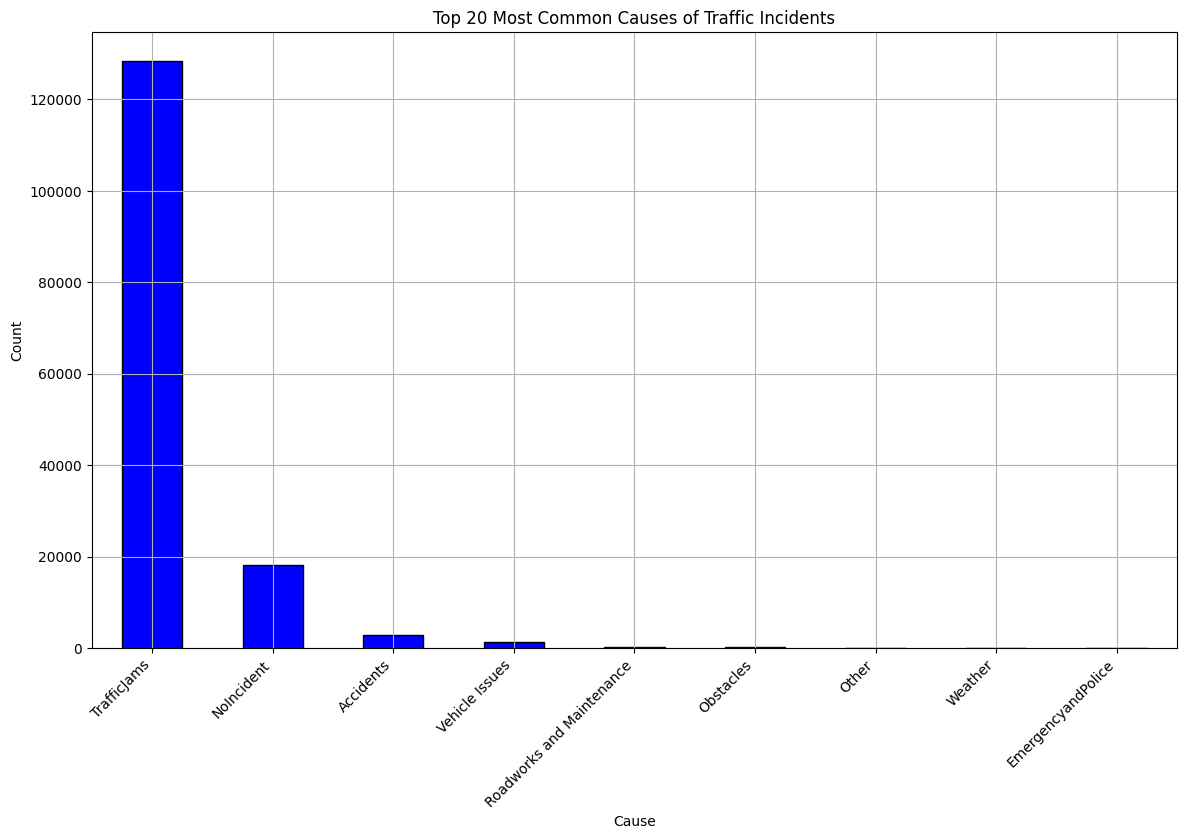

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each cause in CauseGroundDetail
top_20_causes = df_copy['CauseGroundDetail'].value_counts().head(20)
print(top_20_causes)

# Plot the top 20 most common causes
plt.figure(figsize=(14, 8))
top_20_causes.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Top 20 Most Common Causes of Traffic Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

#Rush hour traffic jam (no cause reported)
#Traffic jam outside rush hour (no cause reported)
#Rush hour traffic jam (no cause reported) with work found in Spin

In [10]:
# Define categories and their corresponding incidents
incident_categories = {
    "Accidents": [
        "Ongeval(len)", "Ongeval (met opruim/berging)", "Ongeval met vrachtwagen(s)",
        "Ongeval op aansluitende weg", "Ongeval (en weersomstandigheden)", "Ongeval (in een spitsfile)",
        "Ongeval vrachtwagen (met opruim/berging)", "Ongeval op aansluitende weg (met spitsfile)",
        "Ongeval op aansluitende weg (en incident op aansluitende weg)", "Ongeval (met spoedreparatie)",
        "Ongeval (met schade RWS)", "Ongeval (met ongeval op aanslutiende weg)", "Ongeval vrachtwagen (in een spitsfile)",
        "Ongeval op stedelijke weg", "Ongeval (met ongeval en ongeval op aansluitende weg)", "Ongeval (met ander incident)",
        "Ongeval (met file op omleidingsroute)", "Ongeval (met object op de weg)", "Ongeval vrachtwagen (met spoedreparatie)",
        "Ongeval op provinciale weg", "Ongeval (met opruim/berging) (en defecte vrachtwagen)", "Ongeval vrachtwagen (met defecte vrachtwagen)",
        "Ongeval (met incident op aanslutiende weg)", "Ongeval (met opruim / berging en ongeval op aansluitende weg)",
        "Ongeval (en daarna defect voertuig)", "Incident (ongeval vrachtwagen) en incident (defect voertuig)",
        "Incident op aansluitende weg", "Incident op provinciale weg", "Incident op stedelijke weg", "Incident op andere rijrichting",
        "Spitsfile (met een incident op aansluitende weg)", "Incident op aansluitende weg en spitsfile", "Spitsfile (met incident op aansluitende weg)",
        "Eerder(e) ongeval(len)", "Eerder ongeval op aansluitende weg", "Eerder incident op aansluitende weg",
        "Afremmend verkeer als gevolg van kijkers naar ongeval(len)", "Spitsfile (met ongeval)", "Spitsfile (met ongeval op aansluitende weg)",
        "Spitsfile (met incident)", "Spitsfile (met een incident op aansluitende weg)", "Spitsfile (met ongeval vrachtwagen)", "Ongevalen(filebuitenspitszonderoorzaak)",
        "Spitsfile(metongevalvrachtauto)", "Ongeval(endaarnawerkzaamheden)", "Spitsfile(metongevalenongevalopaansluitendeweg)"
    ],
    "Traffic Jams": [
        "Spitsfile (geen oorzaak gemeld)",
        "File buiten spits (geen oorzaak gemeld)","Spitsfile (met vrachtwagen)",
        "Spitsfile (geen oorzaak gemeld) met gevonden werk in Spin", "Extra verkeersdrukte door verkeer dat een omleiding volgt",
        "File op omleidingsroute (en file zonder oorzaak)", "Evenementen (en spitsfile)",
        "Evenementen (en files buiten spits zonder oorzaak)", "Spitsfile"
    ],
    "Vehicle Issues": [
        "Defect(e) voertuig(en)", "Defecte vrachtwagen(s)", "Defect voertuig (met opruim/berging)", "Defecte bus(sen)",
        "Defecte vrachtwagen (met opruim/berging)", "Defect voertuig (met opruim/berging en spitsfile)", "Defecte vrachtwagen (met ongeval)",
        "Defecte vrachtwagen (in een spitsfile)", "Defect voertuig (object op de weg)", "Defecte vrachtwagen (object op de weg in een spitsfile)",
        "Defect voertuig (en daarna ongeval)", "Defecte vrachtwagen (en ongeval)", "Defect voertuig (met spoedreparatie)",
        "Defecte vrachtwagen (met ongeval en opruim/berging)", "Defecte vrachtwagen (en files buiten spits zonder oorzaak)","Defecte vrachtwagen (object op de weg)",
        "Eerder pechgeval", "Spitsfile (met defect voertuig)", "Spitsfile (defect voertuig en berging)", "Teho(o)g(e)voertuig(en)", "Brandend(e)voertuig(en)",
        "Defectvoertuig(metspitsfile)", "Defectvoertuig(enanderincident)", "Defectevrachtwagen(enobjectopdewegineenspitsfile)", "Vehicle Issues"
    ],
    "Obstacles": [
        "Voorwerpen op de weg", "Object op de weg (met opruim/berging)", "Er ligt rommel op de weg", "Afgevallen lading(en)",
        "Geschaarde aanhanger(s)", "Geschaarde trekker(s) met oplegger", "Gekanteld(e) voertuig(en)", "Gekanteld(e) vrachtwagen(s)",
        "Mensen op de weg", "Dieren op de weg", "Omgewaaide bo(o)m(en)",
        "Gladde weg", "Water op de weg", "Wegdek in slechte toestand", "Modder op het wegdek", "Olie op het wegdek",
        "Zand op het wegdek", "Sneeuwval", "Winterse buien", "Onweersbuien", "Mist", "Spitsfile (met object op de weg)",
        "Beschadigdegeleiderail", "Objectopdeweg(ineenspitsfile)"
    ],
    "Roadworks and Maintenance": [
        "Spoedreparatie", "Wegwerkzaamheden", "Werkzaamheden op stedelijke weg", "Werkzaamheden op aansluitende weg",
        "Werkzaamheden in de berm", "Spitsstrook aan de rechterzijde gesloten", "Spitsstrook aan de linkerzijde gesloten",
        "Spitsstrook aan de rechterzijde versperd", "Spitsstrook aan de linkerzijde versperd", "Schade aan tunnel", "Schade aan wegmeubilair",
        "Verzakkingen", "Er wordt zout gestrooid", "Opgehoogde werkzaamheden", "Werkzaamheden (en daarna ongeval)",
        "Werkzaamheden (en file buiten spits zonder oorzaak)", "Werkzaamheden (in een spitsfile)", "Opruimwerkzaamheden",
        "Opruim/bergingswerkzaamheden (in een spitsfile)", "Opruimingswerkzaamheden",  "Spitsfile (en spoedreparatie)", "Spitsfile (en spoedreparatie)",
        "Extra verkeersdrukte door werkzaamheden elders", "Spitsfile(meteenincident)", "spoedreparatie(enspitsfile)", "Filebuitenspitszonderoorzaak(metwerkzaamheden)",
        "Roadworks and Maintenance" 
    ],
    "Emergency and Police": [
        "Betoging", "Politieonderzoek", "Politieactie", "Spoedtransport", "Ongevalsonderzoek"
    ],
    'Weather': [
        'Bermbrand', 'Sneeuwval', 'Onweersbuien', 'Winterse buien', 'Regenval', 'Mist', 'Falen DVM (en spitsfile)', 'Technische storing'
    ],
    "Other": [
        "Incident (met opruim/berging)", "Spitsfile (en schade RWS)", "Langza(a)m(e) voertuig(en)", "Spookrijder(s)",
        "Technische storing", "Verkeerslichten buiten werking", "Falen DVM (en spitsfile)", "Schade aan tunnel",
        "Schade aan wegmeubilair", "Verzakkingen", "Spitsfile (en schade RWS)", "Onwelwording", "Ophoogscript",
        "Brandindebuurtvandeweg", "Recreatie-envakantieverkeer", "schadeRWS(enspitsfile)", "Tehoogvoertuiggesignaleerd,wordtafgehandeld",
        "Tunnel gesloten", "Rijstrook voor hulpdiensten afgesloten", "Spitsstrook aan de rechterzijde gesloten",
        "Spitsstrook aan de linkerzijde gesloten", "Spitsstrook aan de rechterzijde versperd", "Spitsstrook aan de linkerzijde versperd"
    ]
}

# Reverse the mapping to have cause as key and category as value
reverse_cause_mapping = {cause.strip().replace(' ', ''): category for category, causes in incident_categories.items() for cause in causes}

# Strip any leading/trailing spaces and remove all spaces from the CauseGroundDetail values
df_copy['CauseGroundDetail'] = df_copy['CauseGroundDetail'].str.strip().str.replace(' ', '', regex=False)

# Replace old names with new categories
df_copy['CauseGroundDetail'] = df_copy['CauseGroundDetail'].replace(reverse_cause_mapping)

# Display the updated DataFrame
df_copy['CauseGroundDetail']


0         NoIncident
1         NoIncident
2         NoIncident
3         NoIncident
4         NoIncident
             ...    
151489    NoIncident
151490    NoIncident
151491    NoIncident
151492    NoIncident
151493    NoIncident
Name: CauseGroundDetail, Length: 151494, dtype: object

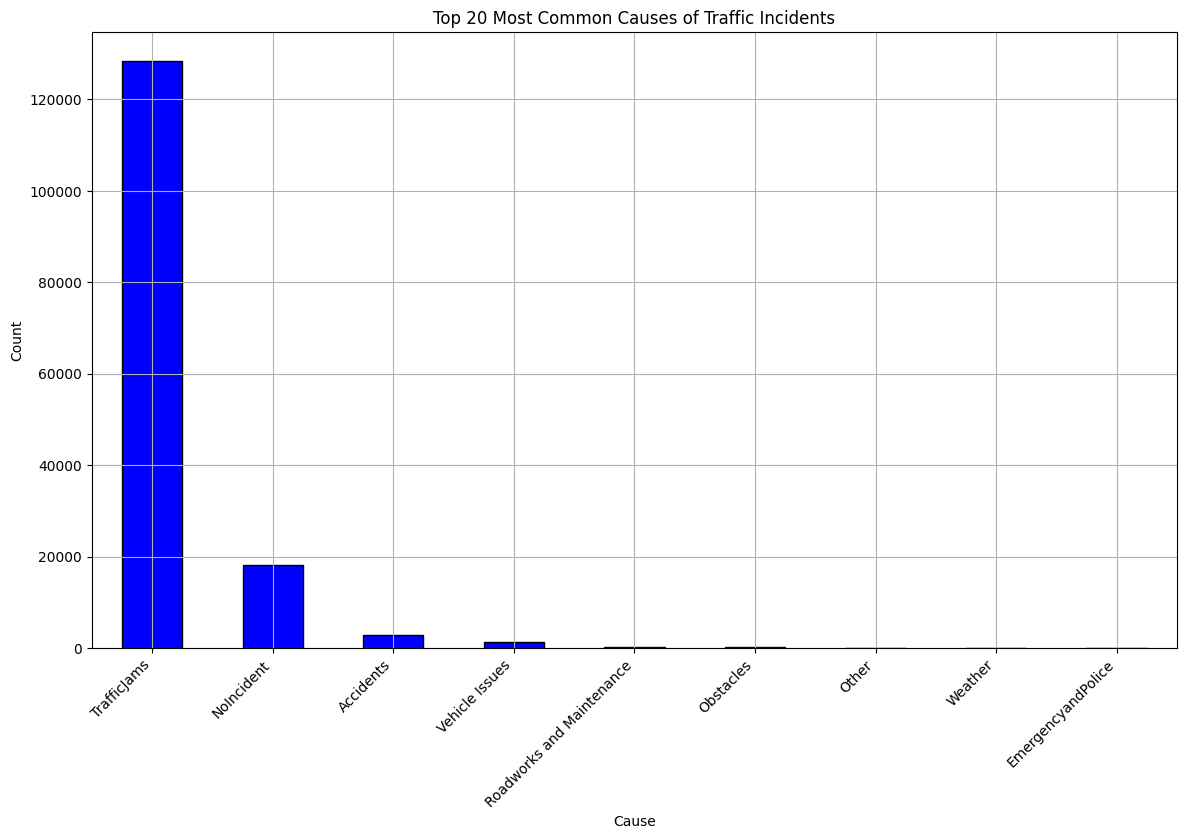

In [11]:
import matplotlib.pyplot as plt

# Count the occurrences of each cause within the categorized data
cause_counts = df_copy['CauseGroundDetail'].value_counts()

# Plot the top 20 most common causes
plt.figure(figsize=(14, 8))
cause_counts.head(20).plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Top 20 Most Common Causes of Traffic Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [12]:
# Save the filtered dataset to a CSV file
filtered_file_path = 'filtered_categorized_merged_data.csv'
df_copy.to_csv(filtered_file_path, index=False)

## Feature Engineering

### Loading the Filtered Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = pd.read_csv('filtered_categorized_merged_data.csv')
# df_filtered = pd.read_csv('finally_Cline.csv')

df_filtered.head(5)

C:\Users\erend\AppData\Local\Temp\ipykernel_14144\2332058533.py:4: DtypeWarning: Columns (43,44,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtered = pd.read_csv('filtered_categorized_merged_data.csv')


,NLSituationNumber,DateFileStart,DateFileEnd,TimeFileStart,TimeFileEnd,FileSeverity,AvgLength,FileDuration,HectometerHead,HectometerTail,...,CloudCover,Humidity,Weather,WeatherCode,Fog,Rain,Snow,Thunder,IceFormation,datetime_y
0,3590923,2023-06-14,2023-06-14,14:34:28,14:37:00,"5,922","2,338,000","2,533","60,5","58,2",...,0,28,,5,0,0,0,0,0,2023-06-14 14:00:00
1,3590923,2023-06-14,2023-06-14,14:34:28,14:37:00,"5,922","2,338,000","2,533","60,5","58,2",...,0,25,,5,0,0,0,0,0,2023-06-14 14:00:00
2,3590923,2023-06-14,2023-06-14,14:34:28,14:37:00,"5,922","2,338,000","2,533","60,5","58,2",...,0,27,,5,0,0,0,0,0,2023-06-14 14:00:00
3,3590923,2023-06-14,2023-06-14,14:34:28,14:37:00,"5,922","2,338,000","2,533","60,5","58,2",...,0,29,,5,0,0,0,0,0,2023-06-14 14:00:00
4,3591484,2023-06-14,2023-06-14,16:21:29,17:59:14,"746,553","7,637,000","97,750","61,3","58,0",...,0,31,,5,0,0,0,0,0,2023-06-14 16:00:00


1. Traffic Severity Impact:
    - Normalized traffic severity.

2. Weather Conditions Impact:
    - Binary indicators for adverse weather conditions (fog, rain, snow, thunder, ice formation).

In [14]:
# Inspect unique values in the AvgLength column
unique_avg_length = df_filtered['AvgLength'].unique()
print("Unique values in AvgLength:", unique_avg_length)

Unique values in AvgLength: ['0' '2,000,000' '3,000,000' ... '5,845,000' '7,177,000' '629,000']


In [15]:
# Function to clean and normalize FileSeverity
def clean_and_normalize_fileseverity(column):
    # Remove thousands separator and replace decimal separator
    column = column.str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    # Convert to numeric
    column = pd.to_numeric(column, errors='coerce')
    # Normalize the column
    column_normalized = column / column.max()
    return column_normalized

In [16]:
# Clean and normalize FileSeverity
df_filtered['TrafficSeverityNormalized'] = clean_and_normalize_fileseverity(df_filtered['FileSeverity'].astype(str))

# Display the first few rows to verify
print(df_filtered[['FileSeverity', 'TrafficSeverityNormalized']].head())

  FileSeverity  TrafficSeverityNormalized
0            0                        0.0
1            0                        0.0
2            0                        0.0
3            0                        0.0
4            0                        0.0


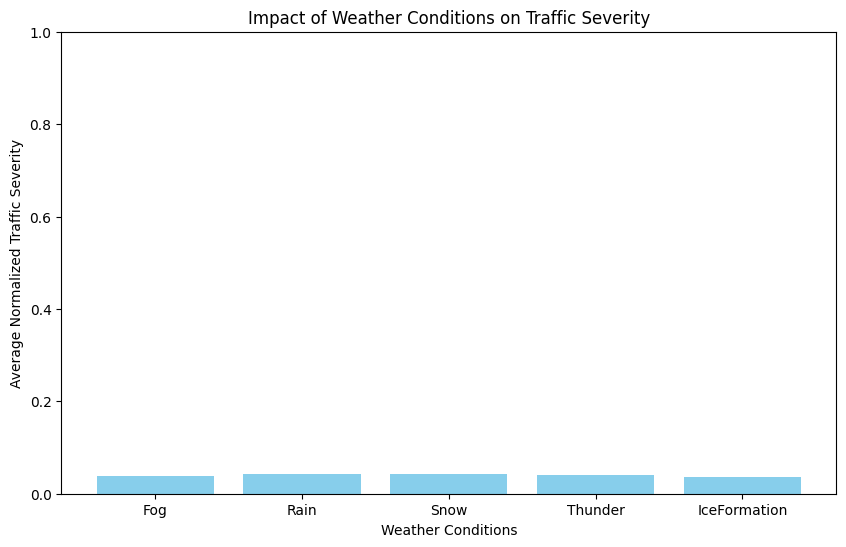

In [17]:
# List of potential weather condition columns (adjust based on your dataset)
weather_conditions = ['Fog','Rain', 'Snow', 'Thunder', 'IceFormation']

# Calculate the average traffic severity for each weather condition
average_severity = {condition: df_filtered[df_filtered[condition] == 1]['TrafficSeverityNormalized'].mean() for condition in weather_conditions}

# Convert to DataFrame for easier plotting
severity_df = pd.DataFrame(list(average_severity.items()), columns=['WeatherCondition', 'AverageSeverity'])

# Plot the impact of weather conditions on traffic severity
plt.figure(figsize=(10, 6))
plt.bar(severity_df['WeatherCondition'], severity_df['AverageSeverity'], color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Normalized Traffic Severity')
plt.title('Impact of Weather Conditions on Traffic Severity')
plt.ylim(0, 1)  # Normalized severity ranges from 0 to 1
plt.show()

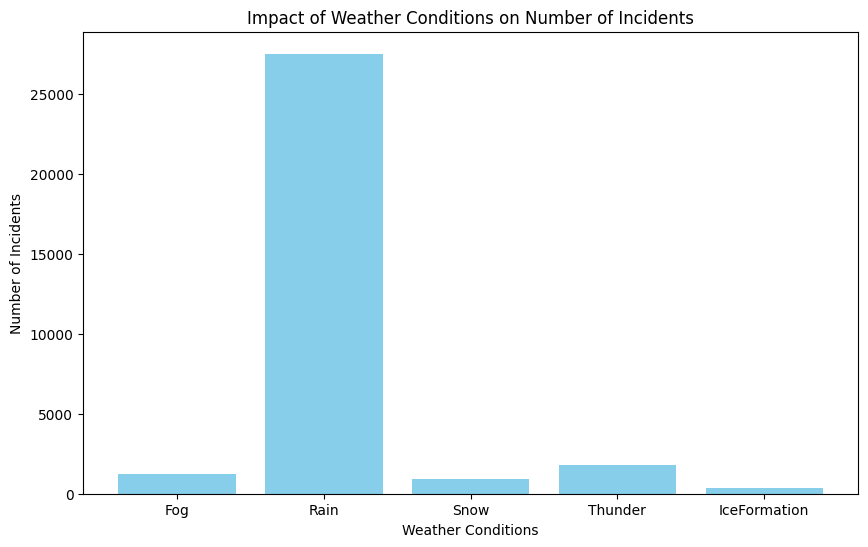

In [18]:
weather_conditions = ['Fog','Rain', 'Snow', 'Thunder', 'IceFormation']

# Calculate the number of incidents for each weather condition
incident_counts = {condition: df_filtered[df_filtered[condition] == 1].shape[0] for condition in weather_conditions}

# Convert to DataFrame for easier plotting
incident_counts_df = pd.DataFrame(list(incident_counts.items()), columns=['WeatherCondition', 'IncidentCount'])

# Plot the impact of weather conditions on number of incidents
plt.figure(figsize=(10, 6))
plt.bar(incident_counts_df['WeatherCondition'], incident_counts_df['IncidentCount'], color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')
plt.title('Impact of Weather Conditions on Number of Incidents')
plt.show()

In [19]:
# List of potential weather condition columns (adjust based on your dataset)
weather_conditions = ['Fog', 'Rain', 'Snow', 'Thunder', 'IceFormation']

# Convert weather condition columns to numeric
for condition in weather_conditions:
    df_filtered[condition] = pd.to_numeric(df_filtered[condition], errors='coerce')


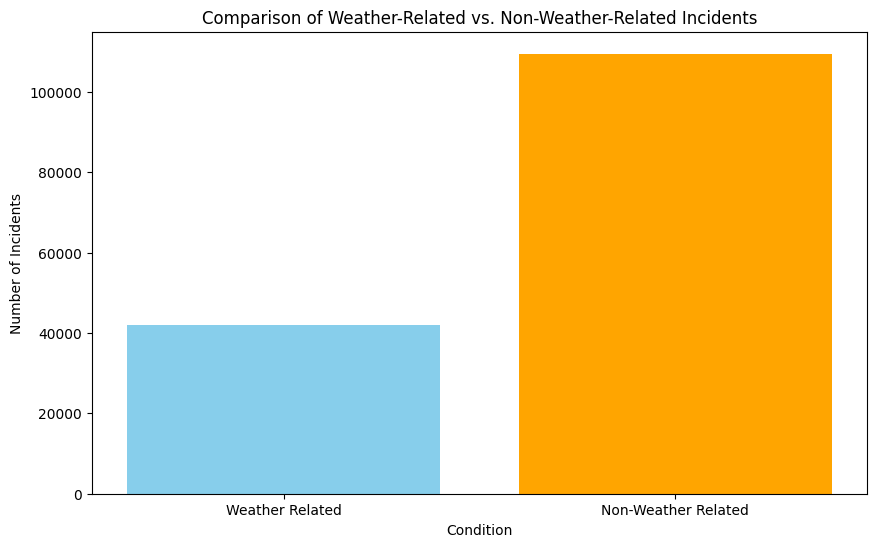

             Condition  IncidentCount
0      Weather Related          42009
1  Non-Weather Related         109485


In [20]:
# Calculate the number of incidents related to weather
weather_related_incidents = df_filtered[df_filtered[weather_conditions].sum(axis=1) > 0].shape[0]

# Calculate the number of incidents not related to weather
non_weather_related_incidents = df_filtered[df_filtered[weather_conditions].sum(axis=1) == 0].shape[0]

# Create a DataFrame for plotting
incident_comparison_df = pd.DataFrame({
    'Condition': ['Weather Related', 'Non-Weather Related'],
    'IncidentCount': [weather_related_incidents, non_weather_related_incidents]
})

# Plot the comparison of incidents related to weather vs. not related to weather
plt.figure(figsize=(10, 6))
plt.bar(incident_comparison_df['Condition'], incident_comparison_df['IncidentCount'], color=['skyblue', 'orange'])
plt.xlabel('Condition')
plt.ylabel('Number of Incidents')
plt.title('Comparison of Weather-Related vs. Non-Weather-Related Incidents')
plt.show()

# Display the incident comparison counts
print(incident_comparison_df)

In [21]:
# List of potential weather condition columns (adjust based on your dataset)
weather_conditions = ['Fog', 'Rain', 'Snow', 'Thunder', 'IceFormation']

# Convert weather condition columns to numeric
for condition in weather_conditions:
    df_filtered[condition] = pd.to_numeric(df_filtered[condition], errors='coerce')

# Create a column to indicate weather-related incidents
df_filtered['WeatherRelated'] = df_filtered[weather_conditions].sum(axis=1) > 0

# Create a column to indicate non-weather-related incidents
df_filtered['NonWeatherRelated'] = df_filtered['WeatherRelated'] == False

# Ensure Date column is in datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Display the first few rows to verify
print(df_filtered[['Date', 'WeatherRelated', 'NonWeatherRelated']].sample(10))

             Date  WeatherRelated  NonWeatherRelated
150206 2024-02-26           False               True
83098  2022-10-11           False               True
40321  2021-03-29           False               True
144030 2024-09-01           False               True
43335  2021-09-07           False               True
89294  2022-12-16           False               True
20613  2019-10-16            True              False
80206  2022-10-25           False               True
117672 2023-06-28           False               True
79475  2022-10-20           False               True


C:\Users\erend\AppData\Local\Temp\ipykernel_9880\1304539817.py:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


In [22]:
# Ensure Date column is in datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Sort by Date
df_filtered = df_filtered.sort_values(by='Date')

# Create time shifts to analyze temporal relationships
df_filtered['PrevWeatherRelated'] = df_filtered['WeatherRelated'].shift(1)
df_filtered['NextNonWeatherRelated'] = df_filtered['NonWeatherRelated'].shift(-1)

# Analyze the relationship
temporal_analysis = df_filtered[(df_filtered['PrevWeatherRelated'] == True) & (df_filtered['NextNonWeatherRelated'] == True)]

# Display the results
print(temporal_analysis[['Date', 'WeatherRelated', 'NonWeatherRelated', 'PrevWeatherRelated', 'NextNonWeatherRelated']])

             Date  WeatherRelated  NonWeatherRelated PrevWeatherRelated  \
1744   2019-01-02            True              False               True   
1742   2019-01-02           False               True               True   
1753   2019-01-02            True              False               True   
1769   2019-01-02           False               True               True   
1766   2019-01-02            True              False               True   
...           ...             ...                ...                ...   
151272 2024-12-03           False               True               True   
151265 2024-12-03            True              False               True   
151262 2024-12-03            True              False               True   
151261 2024-12-03           False               True               True   
151257 2024-12-03           False               True               True   

       NextNonWeatherRelated  
1744                    True  
1742                    True  
1753  

In [23]:
# Group by date and count incidents
daily_incidents = df_filtered.groupby(df_filtered['Date'].dt.date).agg({
    'WeatherRelated': 'sum',
    'NonWeatherRelated': 'sum'
}).reset_index()

# Calculate correlation
correlation_matrix = daily_incidents[['WeatherRelated', 'NonWeatherRelated']].corr()

# Display the correlation matrix
print(correlation_matrix)

                   WeatherRelated  NonWeatherRelated
WeatherRelated           1.000000          -0.169764
NonWeatherRelated       -0.169764           1.000000


           TimeFileStart         TimeFileEnd  TimeDifferenceMinutes
1749 2024-06-04 14:09:00 2024-06-04 16:03:58             114.966667
1748 2024-06-04 14:20:00 2024-06-04 14:30:32              10.533333
1747 2024-06-04 14:18:00 2024-06-04 14:29:55              11.916667
1746 2024-06-04 14:30:00 2024-06-04 15:04:27              34.450000
1745 2024-06-04 14:30:00 2024-06-04 15:34:27              64.450000


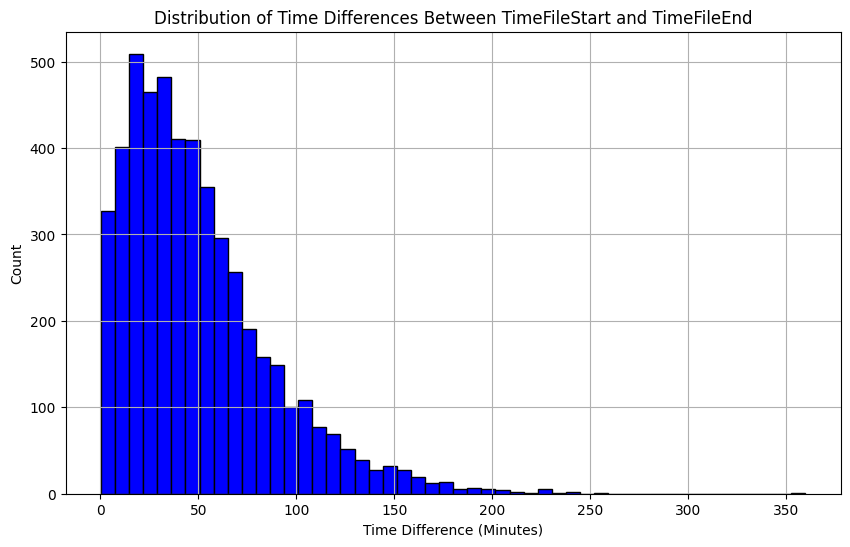

In [24]:
# Exclude 'TrafficJams' and 'NoIncident' categories
excluded_categories = ['TrafficJams', 'NoIncident']
df_filtered = df_filtered[~df_filtered['CauseGroundDetail'].isin(excluded_categories)]

# Ensure 'TimeFileEnd' and 'TimeFileStart' are in datetime format
df_filtered['TimeFileStart'] = pd.to_datetime(df_filtered['TimeFileStart'])
df_filtered['TimeFileEnd'] = pd.to_datetime(df_filtered['TimeFileEnd'])

# Calculate time difference in minutes
df_filtered['TimeDifferenceMinutes'] = (df_filtered['TimeFileEnd'] - df_filtered['TimeFileStart']).dt.total_seconds() / 60

# Filter out negative time differences
df_filtered = df_filtered[df_filtered['TimeDifferenceMinutes'] >= 0]

# Display the first few rows to verify
print(df_filtered[['TimeFileStart', 'TimeFileEnd', 'TimeDifferenceMinutes']].head())

# Plot the time differences using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['TimeDifferenceMinutes'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Differences Between TimeFileStart and TimeFileEnd')
plt.grid(True)
plt.show()

           TimeFileStart         TimeFileEnd  TimeDifferenceMinutes
1748 2024-06-04 14:20:00 2024-06-04 14:30:32              10.533333
1747 2024-06-04 14:18:00 2024-06-04 14:29:55              11.916667
1737 2024-06-04 18:12:00 2024-06-04 18:27:51              15.850000
1728 2024-06-04 16:56:00 2024-06-04 16:56:30               0.500000
3565 2024-06-04 17:25:00 2024-06-04 17:38:45              13.750000


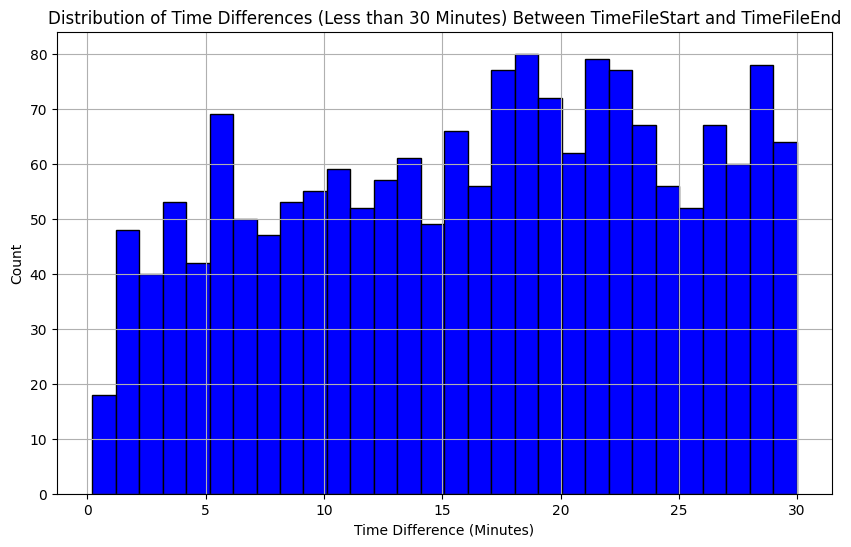

In [25]:
# excluded_categories = ['TrafficJams', 'NoIncident'] for data visualization
excluded_categories = ['TrafficJams', 'NoIncident']

# Filter out time differences greater than or equal to 30 minutes
df_filtered_30mins = df_filtered[df_filtered['TimeDifferenceMinutes'] < 30]

# Display the first few rows to verify
print(df_filtered_30mins[['TimeFileStart', 'TimeFileEnd', 'TimeDifferenceMinutes']].head())

# Plot the time differences smaller than 30 minutes using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_30mins['TimeDifferenceMinutes'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Differences (Less than 30 Minutes) Between TimeFileStart and TimeFileEnd')
plt.grid(True)
plt.show()

### Categorized Time Periods

           TimeFileStart         TimeFileEnd  TimeDifferenceMinutes  \
1749 2024-06-04 14:09:00 2024-06-04 16:03:58             114.966667   
1748 2024-06-04 14:20:00 2024-06-04 14:30:32              10.533333   
1747 2024-06-04 14:18:00 2024-06-04 14:29:55              11.916667   
1746 2024-06-04 14:30:00 2024-06-04 15:04:27              34.450000   
1745 2024-06-04 14:30:00 2024-06-04 15:34:27              64.450000   

     TimeDifferenceCategory          CauseGroundDetail  
1749                    >45             Vehicle Issues  
1748                  10-15  Roadworks and Maintenance  
1747                  10-15                  Accidents  
1746                  25-45                  Accidents  
1745                    >45                  Accidents  


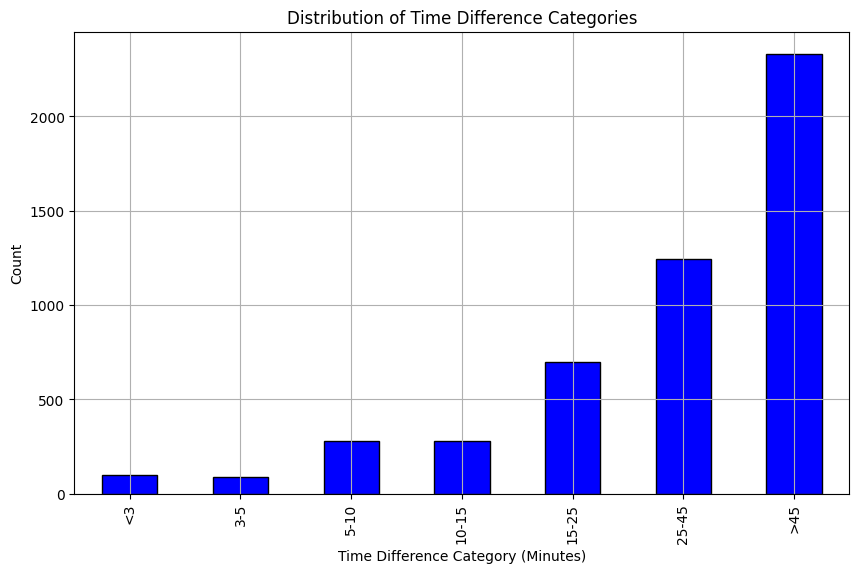

In [26]:
# Define categories for time differences
bins = [0, 3, 5, 10, 15, 25, 45, float('inf')]
labels = ['<3','3-5', '5-10','10-15', '15-25','25-45', '>45']
df_filtered['TimeDifferenceCategory'] = pd.cut(df_filtered['TimeDifferenceMinutes'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(df_filtered[['TimeFileStart', 'TimeFileEnd', 'TimeDifferenceMinutes', 'TimeDifferenceCategory', 'CauseGroundDetail']].head())

# Plot the distribution of time difference categories
category_counts = df_filtered['TimeDifferenceCategory'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Time Difference Category (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Difference Categories')
plt.grid(True)
plt.show()

           TimeFileStart         TimeFileEnd  TimeDifferenceMinutes  \
1749 2024-06-04 14:09:00 2024-06-04 16:03:58             114.966667   
1748 2024-06-04 14:20:00 2024-06-04 14:30:32              10.533333   
1747 2024-06-04 14:18:00 2024-06-04 14:29:55              11.916667   
1746 2024-06-04 14:30:00 2024-06-04 15:04:27              34.450000   
1745 2024-06-04 14:30:00 2024-06-04 15:34:27              64.450000   

     TimeDifferenceCategory          CauseGroundDetail  
1749                    >45             Vehicle Issues  
1748                  10-15  Roadworks and Maintenance  
1747                  10-15                  Accidents  
1746                  25-45                  Accidents  
1745                    >45                  Accidents  


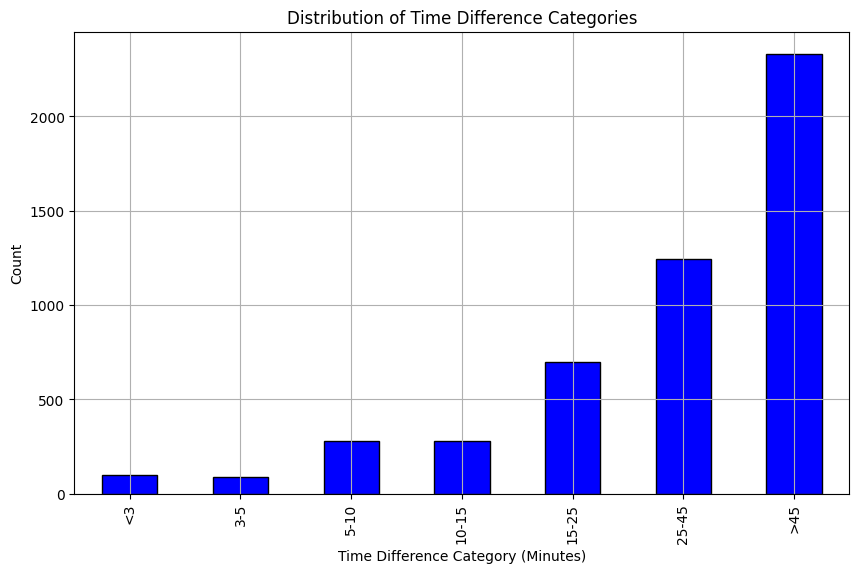

In [27]:
# Exclude 'TrafficJams' and 'NoIncident' categories
excluded_categories = ['TrafficJams', 'NoIncident']

# Define categories for time differences
bins = [0, 3, 5, 10, 15, 25, 45, float('inf')]
labels = ['<3','3-5', '5-10','10-15', '15-25','25-45', '>45']
df_filtered['TimeDifferenceCategory'] = pd.cut(df_filtered['TimeDifferenceMinutes'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(df_filtered[['TimeFileStart', 'TimeFileEnd', 'TimeDifferenceMinutes', 'TimeDifferenceCategory', 'CauseGroundDetail']].head())

# Plot the distribution of time difference categories
category_counts = df_filtered['TimeDifferenceCategory'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Time Difference Category (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Difference Categories')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

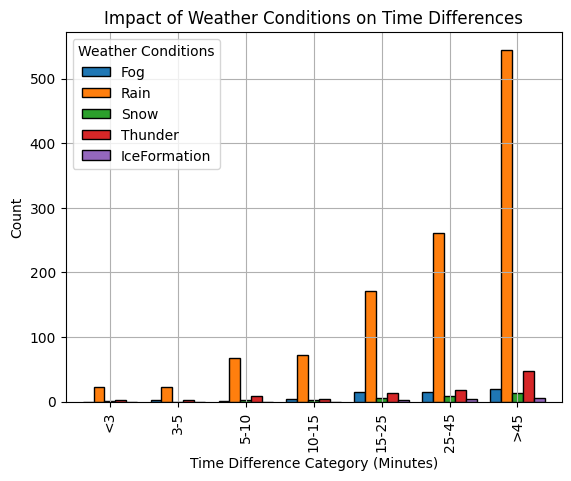

In [28]:
# Define categories for time differences
bins = [0, 3, 5, 10, 15, 25, 45, float('inf')]
labels = ['<3', '3-5', '5-10', '10-15', '15-25', '25-45', '>45']
df_filtered['TimeDifferenceCategory'] = pd.cut(df_filtered['TimeDifferenceMinutes'], bins=bins, labels=labels, right=False)

# Calculate the number of incidents for each weather condition and time difference category
weather_conditions = ['Fog', 'Rain', 'Snow', 'Thunder', 'IceFormation']
time_diff_weather_counts = {condition: df_filtered[df_filtered[condition] == 1]['TimeDifferenceCategory'].value_counts().sort_index() for condition in weather_conditions}

# Convert to DataFrame for easier plotting
time_diff_weather_counts_df = pd.DataFrame(time_diff_weather_counts)

# Plot the impact of weather conditions on time differences
plt.figure(figsize=(12, 8))
time_diff_weather_counts_df.plot(kind='bar', width=0.8, edgecolor='black')
plt.xlabel('Time Difference Category (Minutes)')
plt.ylabel('Count')
plt.title('Impact of Weather Conditions on Time Differences')
plt.legend(title='Weather Conditions')
plt.grid(True)
plt.show()

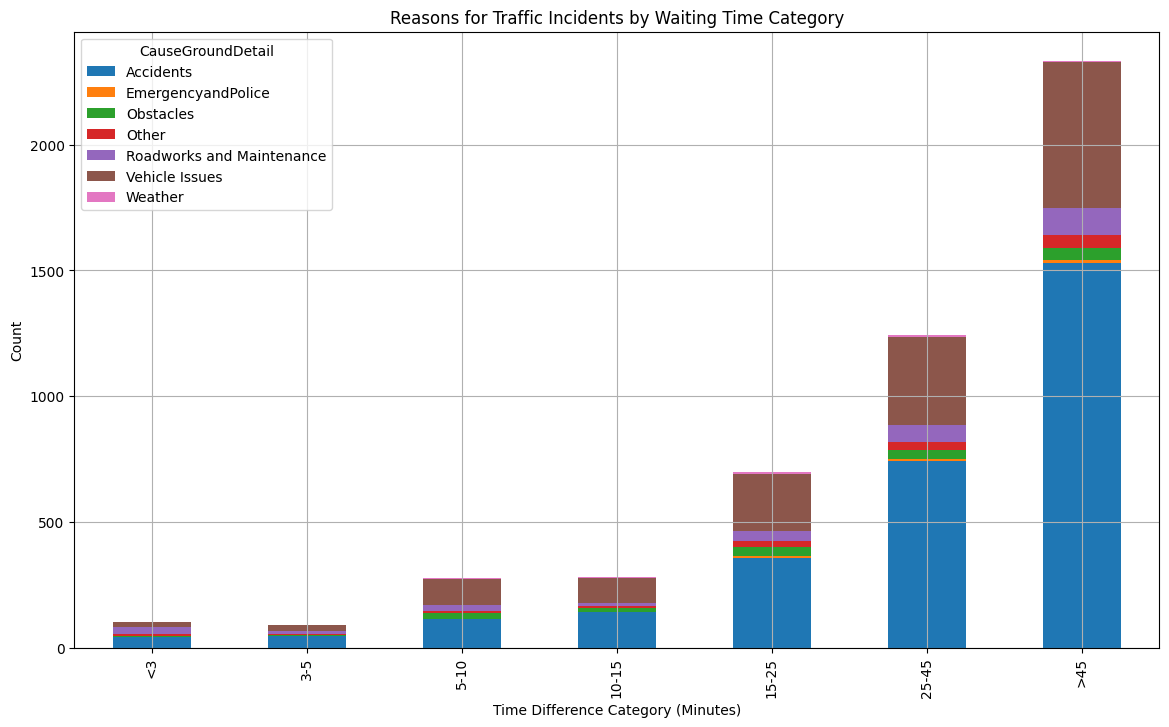

In [29]:
# Exclude 'TrafficJams' and 'NoIncident' categories
excluded_categories = ['TrafficJams', 'NoIncident']

# Analyze the reasons (CauseGroundDetail) behind different time difference categories
reason_counts = df_filtered.groupby('TimeDifferenceCategory')['CauseGroundDetail'].value_counts().unstack().fillna(0)

# Plot the reasons for each time difference category
reason_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Time Difference Category (Minutes)')
plt.ylabel('Count')
plt.title('Reasons for Traffic Incidents by Waiting Time Category')
plt.legend(title='CauseGroundDetail')
plt.grid(True)
plt.show()

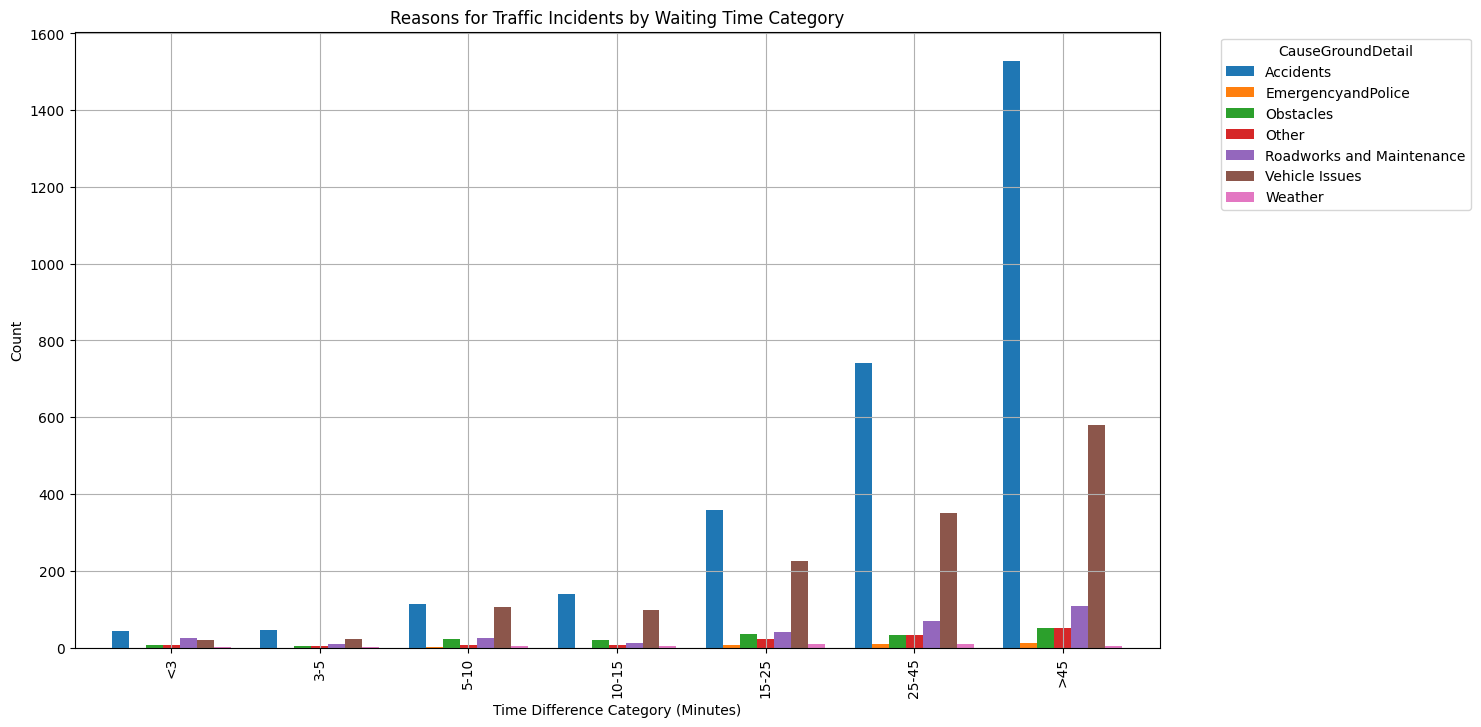

In [30]:
# Exclude 'TrafficJams' and 'NoIncident' categories
excluded_categories = ['TrafficJams', 'NoIncident']

# Analyze the reasons (CauseGroundDetail) behind different time difference categories without 'Traffic Jams'
reason_counts_no_traffic_jams = df_filtered.groupby('TimeDifferenceCategory')['CauseGroundDetail'].value_counts().unstack().fillna(0)

# Plot the reasons for each time difference category without stacking and excluding 'Traffic Jams'
reason_counts_no_traffic_jams.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.xlabel('Time Difference Category (Minutes)')
plt.ylabel('Count')
plt.title('Reasons for Traffic Incidents by Waiting Time Category')
plt.legend(title='CauseGroundDetail', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

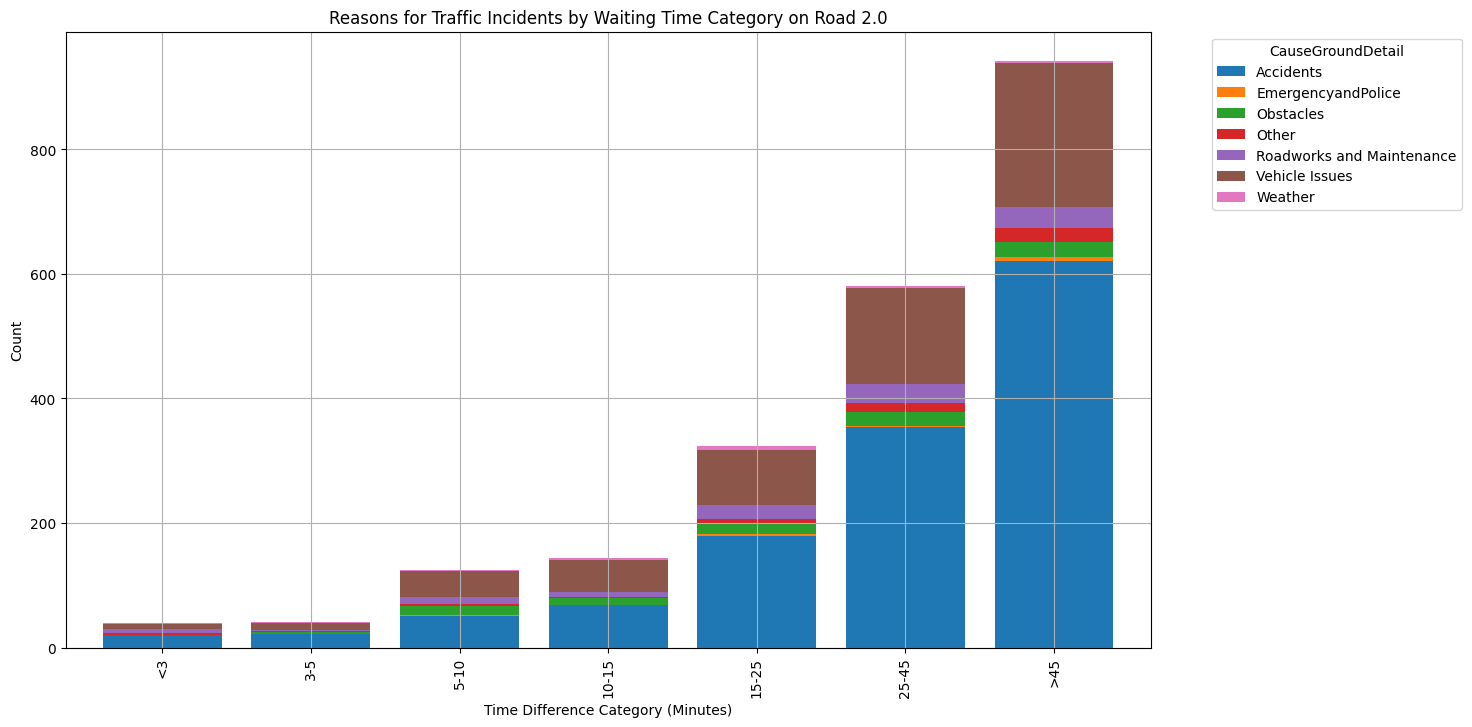

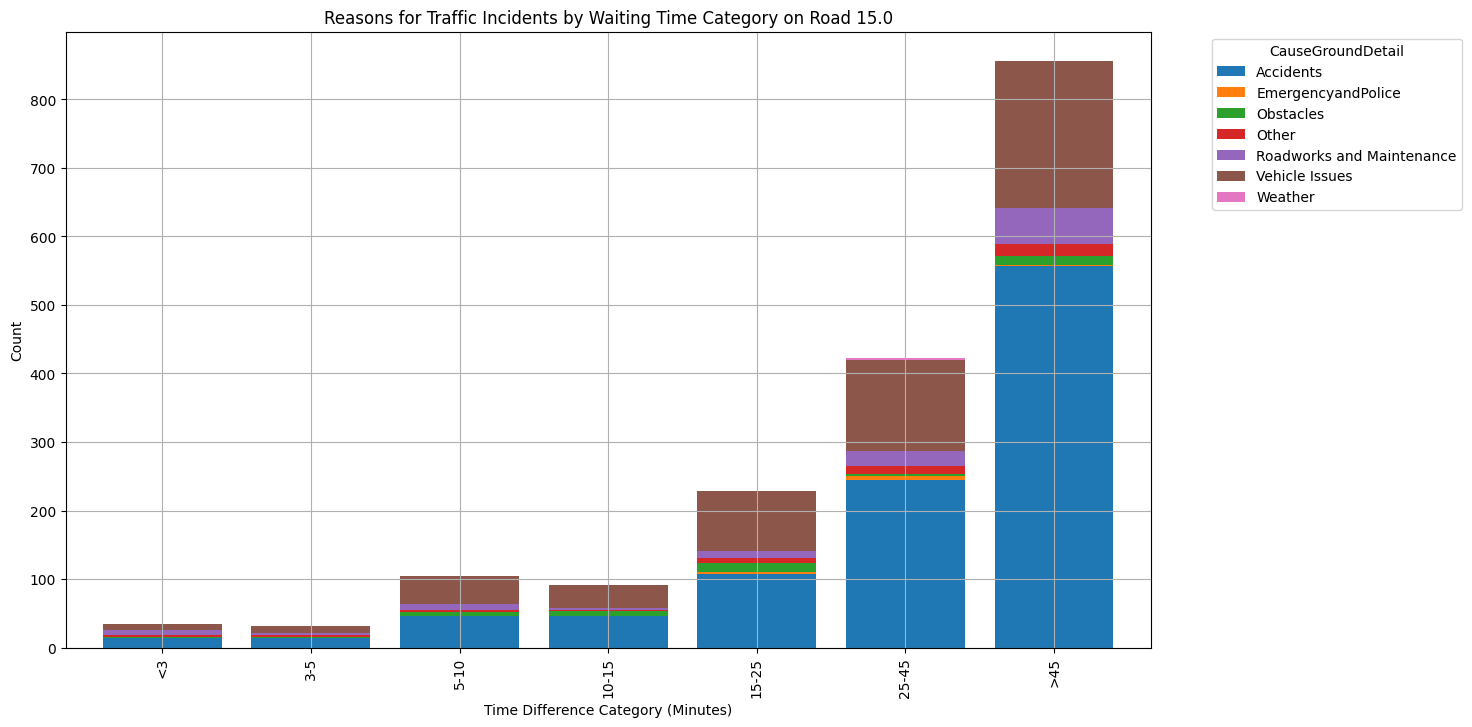

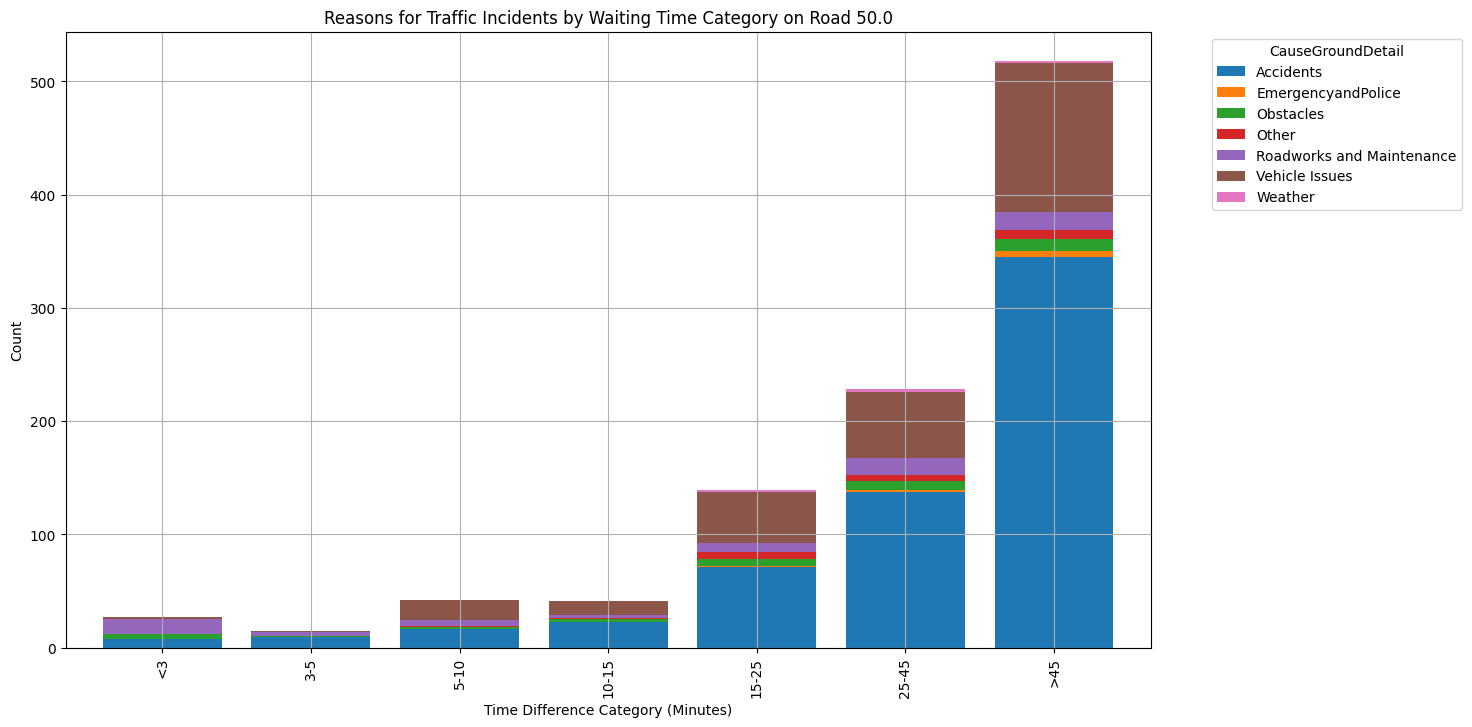

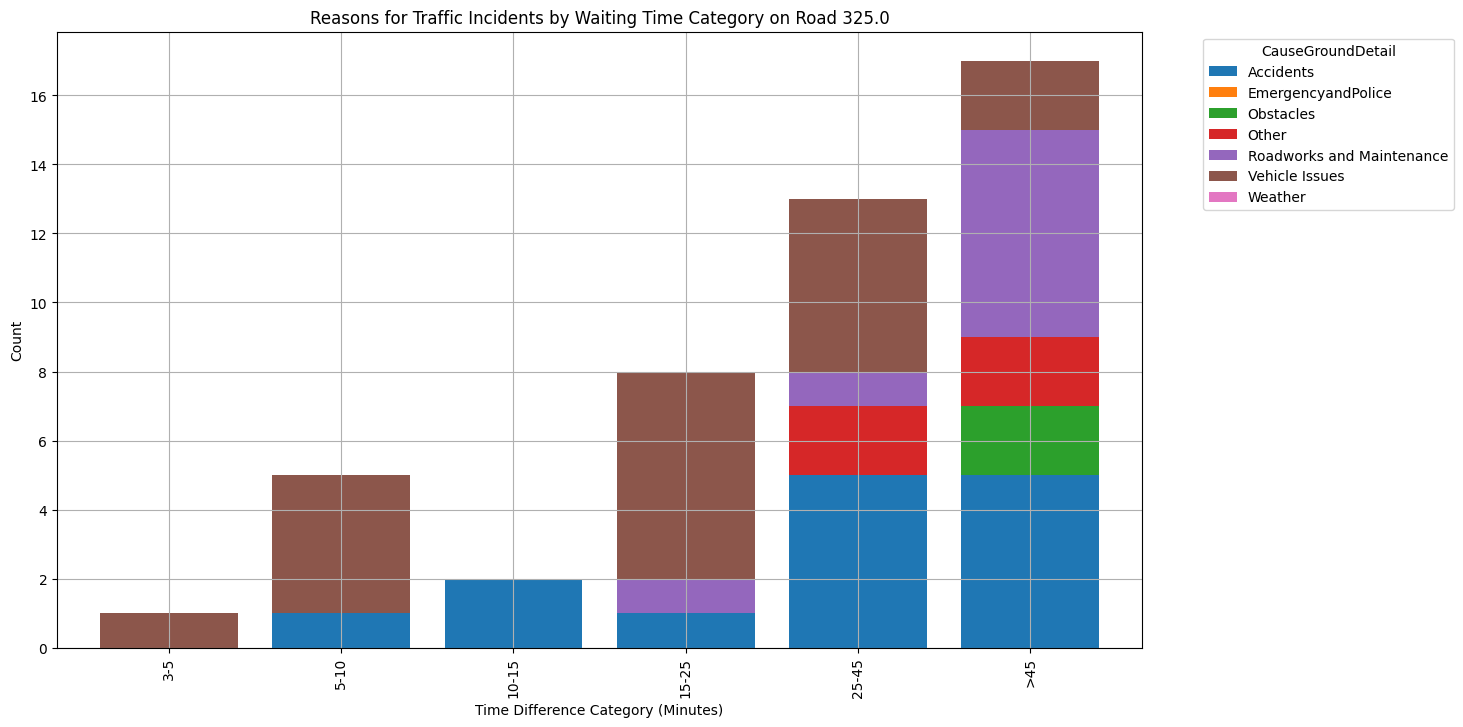

In [31]:
# Exclude 'TrafficJams' and 'NoIncident' categories
excluded_categories = ['TrafficJams', 'NoIncident']

# Group by RoadOms and TimeDifferenceCategory, then count the causes
reason_counts_by_road = df_filtered.groupby(['RouteNumber', 'TimeDifferenceCategory'])['CauseGroundDetail'].value_counts().unstack().fillna(0)

# Plot the reasons for each time difference category by road
for road in reason_counts_by_road.index.levels[0]:
    road_reason_counts = reason_counts_by_road.loc[road]
    fig, ax = plt.subplots(figsize=(14, 8))
    road_reason_counts.plot(kind='bar', stacked=True, ax=ax, width=0.8)
    plt.xlabel('Time Difference Category (Minutes)')
    plt.ylabel('Count')
    plt.title(f'Reasons for Traffic Incidents by Waiting Time Category on Road {road}')
    plt.legend(title='CauseGroundDetail', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [32]:
df_filtered.head()


,NLSituationNumber,DateFileStart,DateFileEnd,TimeFileStart,TimeFileEnd,FileSeverity,AvgLength,FileDuration,HectometerHead,HectometerTail,...,Snow,Thunder,IceFormation,TrafficSeverityNormalized,WeatherRelated,NonWeatherRelated,PrevWeatherRelated,NextNonWeatherRelated,TimeDifferenceMinutes,TimeDifferenceCategory
1749,2490030.0,2019-02-01,2019-02-01,2024-06-04 14:09:00,2024-06-04 16:03:58,"229,933","2,000,000","114,967","35,0","37,0",...,0.0,0.0,0.0,0.229944,True,False,False,False,114.966667,>45
1748,2490040.0,2019-02-01,2019-02-01,2024-06-04 14:20:00,2024-06-04 14:30:32,"21,067","2,000,000","10,533","69,0","67,0",...,0.0,0.0,0.0,0.021068,True,False,True,False,10.533333,10-15
1747,2490036.0,2019-02-01,2019-02-01,2024-06-04 14:18:00,2024-06-04 14:29:55,"23,833","2,000,000","11,917","163,2","161,2",...,0.0,0.0,0.0,0.023834,True,False,True,False,11.916667,10-15
1746,2490042.0,2019-02-01,2019-02-01,2024-06-04 14:30:00,2024-06-04 15:04:27,"94,283","2,736,817","34,450","162,7","165,7",...,0.0,0.0,0.0,0.094288,True,False,True,False,34.450000,25-45
1745,2490044.0,2019-02-01,2019-02-01,2024-06-04 14:30:00,2024-06-04 15:34:27,"309,117","4,796,225","64,450","163,5","157,5",...,0.0,0.0,0.0,0.309132,True,False,True,False,64.450000,>45


In [33]:
file_path = 'filtered_categorized_merged_data.csv'
df_filtered.to_csv
df_filtered.to_csv(file_path, index=False)


In [34]:
import folium

# Coordinates for A2 highway in the Netherlands (some key points)
a2_coords = [
    (52.0894, 5.1073),  # Utrecht
    (51.9244, 4.4777),  # Rotterdam (end of A2)
    (51.4416, 5.4697),  # Eindhoven
    (50.8503, 5.6909)   # Maastricht (beginning of A2)
]

# Create a map centered around the midpoint of A2
map_a2 = folium.Map(location=[51.4416, 5.4697], zoom_start=7)

# Add the A2 highway path to the map
folium.PolyLine(a2_coords, color="blue", weight=2.5, opacity=1).add_to(map_a2)

# Add markers for the key points
for point in a2_coords:
    folium.Marker(location=point).add_to(map_a2)

# Display the map
map_a2.save('map_a2.html')

import IPython
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/map_a2.html" width="100%" height="500"></iframe>'))


c:\Users\erend\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [35]:
from IPython.display import HTML

# HTML code for the iframe
iframe_code = '''
<iframe width="425" height="350" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" src="https://onthegomap.com/?m=r&amp;u=km&amp;w%5B%5D=Routes+may+not+be+suitable+for+public+use.&amp;c%5B%5D=Route+data+%C2%A92024+On+The+Go+Map%2C+OpenStreetMap+Contributors&amp;d=26827&amp;f=cb76f9e3eb&amp;n=1&amp;dm=1&amp;context=embed&amp;r2=iygx9W_hW1ly2o60EEm5Cw14i128FALAH8DOB0~7k2l3o1f6c3ZCk6p1i1b3q1X9e4l6k2f5q1l6k1lAY1x7OX7Y1l2Ep2Gf5e1d6s1l1ER8~8u212XIy572e2gJL4~a1uCL4n2m1z1GjEy4r2Y1h1APEFO1W1Jq1HY1J8tY1i9n4fFo4gFx1OX2Gz1EF2rCi33A4GY1W2a2W8Ey1MW1E8EE6c1PBZ10Na19Or3Lb10b1DJJPd1V79FHOPW30GTr1b1n1x2f4Rl1Z9lDDMVW2j3uA56B0Z4z5NW1D2N7L0NC~1o1B4T1v1PB0~2k8X2u6n1c4x1m3BIv1_1LGVAp7e2b1Az16Z1Cl2Ur2i1X2W2f1o1h3q4FEFCJIv2u1p2Y1NARI545AJg1Ls1LOD62EBk24UOa23Y1Pe25S0E3m11u19k3Lw3D4h1u1t1AJ2Vi4Hq1Vo1d2a3Pq1~1s1FAZ1s1n1c33IAm12Y13W14U3E7C949O3K2Qw1m4Cu10a13I3GLo1JKHIHMPMp5y4JKPKl3W3HGLUVGp2Y2t2g2f1W1t1W1HCR8h1c1NG5CFC2E740U8Y1F8p2k1d1Y1RW1BUNs29a19e1HW214Nu1Jk15o11g10W1Eu2PW1n1a2d1Y19A56HIZ1OPAAm3r1CCY4f1CHENM4Ex1_1j3o378m1i3Oq34GW1_38i12IUKEE6CUa228d1i1e1h117TZ25BDDTJ9M76n14b1Eh3W2X1KTEf3Y2x2m1p5Y2v6_1n3MP4D4v2Eh1Kh2s1X2y1b1STIt1Qb2Ed11V3t1LP_3De1L0Bk15Md8l6Z4x2T9v1Tf1b1B45C0m1Bq1f3i8j3u8h1g3z3s9h1r1Rn1DEZ2m2Vt2Vr35D55t2FD370R5X10p1A3f1Ab5H6Lz6Dd57t19T7Vf1p47D7793fB6i1o2h1n2gB5A4888Eg1q4JEB335Rr2Ff2VZ7Dn65f1L7Ft45Z19Tb3x5HFj5r3X2z1l5Z2V6d1KRQj1u1JIl1Ql18n27BBZ2W2~LWMZ1W1FCd2Ub18d36z1Qn1Un1m1h1y1r1e3v3r3Vq1Hw1FW50UCS2Q1S7KFQd6g5j3e3n2c2h9w9le1qe1l1EHi17ElBmBt4w4rSoSl2o2Z6c6~9cAvAsAhBeBr29FA5E1G4w15SbNsN~GoIZ1Un2o1r2S~12p5Tr1En2g1l5g2RAd13RFZ2z1LX1DV3R9j15l19b1Pn1JTJk1X1m25CTY2DSTY2DW1La11Y15K9AJKy1e5i1w3y1e6e1c4Eq12I1I5Eb1e1b1m1d1e1r5Y6h3g3h7g7v6y6r1s1JET3789A9A0C1G7Gf1c1917L~7_756DE9AXAaAxGyGBW1BI5M1GHI78DEDE8MRSd1q1zEuEHSZ3_3l3y3NOp1s1f8m8r1u1t2Y3PQHMf4g4p6s6NODEVY1v1w1VUFIPOt2m2X1SLo1b7w6tVsVl3s3~4i53G0Q3KBU9852DCB8NId1Y1~4a5h3a3l2a3~3g3f1e1Ca12UCOm2o3g1c1g1UOe12K9Kk3s6Y3q5"></iframe><br/><small><a href="https://onthegomap.com" style="color:#0000FF;text-align:left" target="_blank">On The Go Map</a></small>
'''

# Display the iframe
HTML(iframe_code)


In [36]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import IPython.display

# Load the dataset
df = df_filtered
# Convert HectometerHead and HectometerTail to numeric values
df['HectometerHead'] = df['HectometerHead'].astype(str).str.replace(',', '.').astype(float)
df['HectometerTail'] = df['HectometerTail'].astype(str).str.replace(',', '.').astype(float)

# Define coordinates for key points along the A2 highway (simplified)
# This should ideally be more detailed and accurate
a2_coords = [
    (52.379189, 4.899431),  # Amsterdam
    (52.089444, 5.107798),  # Utrecht
    (51.441642, 5.469722),  # Eindhoven
    (50.851368, 5.690973)   # Maastricht
]

# Map hectometer values to these coordinates (simplified linear interpolation)
def hectometer_to_coords(hectometer):
    total_length = 200  # Assume the total length of A2 in hectometers
    amsterdam, utrecht, eindhoven, maastricht = a2_coords
    segments = [(0, 60, amsterdam, utrecht), (60, 120, utrecht, eindhoven), (120, 200, eindhoven, maastricht)]
    
    for start, end, start_coord, end_coord in segments:
        if start <= hectometer <= end:
            lat = start_coord[0] + (hectometer - start) / (end - start) * (end_coord[0] - start_coord[0])
            lon = start_coord[1] + (hectometer - start) / (end - start) * (end_coord[1] - start_coord[1])
            return [lat, lon]
    return [0, 0]  # Default return if hectometer is out of range

# Create heatmap data
heatmap_data = []
for _, row in df.iterrows():
    mid_hectometer = (row['HectometerHead'] + row['HectometerTail']) / 2
    coord = hectometer_to_coords(mid_hectometer)
    heatmap_data.append(coord + [1])  # Adding a weight of 1 for each traffic jam

# Create a base map
m = folium.Map(location=[52.089444, 5.107798], zoom_start=7)

# Add heatmap layer
HeatMap(heatmap_data, radius=15).add_to(m)

# Save the map
m.save('heatmap_a2.html')

# Display the map
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/heatmap_a2.html" width="100%" height="500"></iframe>'))


In [37]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import IPython.display

# Load the dataset
df = df_filtered


# Convert HectometerHead and HectometerTail to numeric values
df['HectometerHead'] = df['HectometerHead'].astype(str).str.replace(',', '.').astype(float)
df['HectometerTail'] = df['HectometerTail'].astype(str).str.replace(',', '.').astype(float)

# Sample detailed coordinates along the A2 highway
a2_coords = [
    (52.379189, 4.899431),  # Amsterdam
    (52.27122, 4.940576),   # Abcoude
    (52.090737, 5.12142),   # Utrecht
    (52.01998, 5.081658),   # Nieuwegein
    (51.993572, 5.091862),  # Vianen
    (51.958304, 5.22939),   # Culemborg
    (51.80944, 5.25154),    # Zaltbommel
    (51.697816, 5.303675),  # 's-Hertogenbosch
    (51.441642, 5.469722),  # Eindhoven
    (51.253402, 5.713991),  # Weert
    (50.851368, 5.690973)   # Maastricht
]

# Function to interpolate coordinates based on hectometer
def generate_a2_coordinates(hectometer):
    total_hectometers = 200
    index = int((hectometer / total_hectometers) * (len(a2_coords) - 1))
    index = max(0, min(index, len(a2_coords) - 1))  # Ensure index is within bounds
    return a2_coords[index]

# Create heatmap data
heatmap_data = []
for _, row in df.iterrows():
    mid_hectometer = (row['HectometerHead'] + row['HectometerTail']) / 2
    coord = generate_a2_coordinates(mid_hectometer)
    heatmap_data.append([coord[0], coord[1], 1])  # Adding a weight of 1 for each traffic jam

# Create a base map
m = folium.Map(location=[52.089444, 5.107798], zoom_start=7)

# Add heatmap layer
HeatMap(heatmap_data, radius=15).add_to(m)

# Save the map
m.save('heatmap_a2.html')

# Display the map
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/heatmap_a2.html" width="100%" height="500"></iframe>'))


In [38]:
import folium
import geopy.distance

# Key points along the A2 highway
a2_coords = [
    (52.379189, 4.899431),  # Amsterdam
    (52.27122, 4.940576),   # Abcoude
    (52.090737, 5.12142),   # Utrecht
    (52.01998, 5.081658),   # Nieuwegein
    (51.993572, 5.091862),  # Vianen
    (51.958304, 5.22939),   # Culemborg
    (51.80944, 5.25154),    # Zaltbommel
    (51.697816, 5.303675),  # 's-Hertogenbosch
    (51.441642, 5.469722),  # Eindhoven
    (51.253402, 5.713991),  # Weert
    (50.851368, 5.690973)   # Maastricht
]

# Function to find the exact km point along the A2
def find_km_point(coords, km_point, total_km=217):
    distance_covered = 0
    for i in range(len(coords) - 1):
        start = coords[i]
        end = coords[i + 1]
        segment_distance = geopy.distance.distance(start, end).km
        if distance_covered + segment_distance >= km_point:
            fraction = (km_point - distance_covered) / segment_distance
            lat = start[0] + fraction * (end[0] - start[0])
            lon = start[1] + fraction * (end[1] - start[1])
            return (lat, lon)
        distance_covered += segment_distance
    return coords[-1]  # Return the last point if km_point exceeds the total distance

# Find the location of the 105th km
km_105_location = find_km_point(a2_coords, 105)

# Create a map and add a marker for the 105th km point
m = folium.Map(location=[52.089444, 5.107798], zoom_start=7)
folium.Marker(km_105_location, popup='105th km on A2 Highway', icon=folium.Icon(color='red')).add_to(m)

# Save the map
m.save('km_105_a2.html')

# Display the map
import IPython.display
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/km_105_a2.html" width="100%" height="500"></iframe>'))


In [39]:
import folium

# Coordinates extracted from the Google Maps link (assuming you manually found them as the link itself does not provide direct coordinates)
coords = (51.946470, 5.292160)  # Example coordinates from the given link

# Create a map centered around the extracted coordinates
m = folium.Map(location=coords, zoom_start=15)

# Add a marker for the specific location
folium.Marker(coords, popup='Location from Google Maps link', icon=folium.Icon(color='blue')).add_to(m)

# Save the map
m.save('visualized_location.html')

# Display the map
import IPython.display
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/visualized_location.html" width="100%" height="500"></iframe>'))


In [40]:
import folium

# List of coordinates
coordinates = [
    (51.312405, 5.616699), (51.313074, 5.606115), (51.333598, 5.580849), (51.348254, 5.543909),
    (51.403406, 5.500356), (51.405741, 5.433465), (51.448071, 5.427350), (51.458836, 5.410217),
    (51.481279, 5.404994), (51.497686, 5.474670), (51.524508, 5.469139), (51.540660, 5.482967),
    (51.564830, 5.474209), (51.598436, 5.511544), (51.609696, 5.506320), (51.619284, 5.501788),
    (51.631302, 5.515846), (51.639265, 5.575151), (51.653279, 5.599580), (51.677247, 5.598121),
    (51.692678, 5.578071), (51.717100, 5.568852), (51.740843, 5.585215), (51.752877, 5.621013),
    (51.780926, 5.639066), (51.806108, 5.676631), (51.835833, 5.687463), (51.877112, 5.733786),
    (51.895178, 5.745002), (51.913804, 5.771582), (51.958160, 5.764745), (51.967248, 5.769047),
    (51.974945, 5.766314), (51.975606, 5.773610), (51.982373, 5.776614), (51.988156, 5.817253),
    (51.986717, 5.822316), (51.985292, 5.864351), (51.983288, 5.869232), (51.983470, 5.881285),
    (51.985714, 5.891817), (51.984686, 5.894893)
]

# Create a map centered around the middle of the coordinates
midpoint = coordinates[len(coordinates) // 2]
m = folium.Map(location=midpoint, zoom_start=10)

# Add a polyline to the map
folium.PolyLine(coordinates, color="blue", weight=2.5, opacity=1).add_to(m)

# Save the map
m.save('line_through_coordinates.html')

# Display the map
import IPython.display
IPython.display.display(IPython.display.HTML('<iframe src="/line_through_coordinates.html" width="100%" height="500"></iframe>'))


In [41]:
import folium

# List of coordinates for the first line
coordinates1 = [
    (51.312405, 5.616699), (51.313074, 5.606115), (51.333598, 5.580849), (51.348254, 5.543909),
    (51.403406, 5.500356), (51.405741, 5.433465), (51.448071, 5.427350), (51.458836, 5.410217),
    (51.481279, 5.404994), (51.486389, 5.420365), (51.493039, 5.438567), (51.497686, 5.474670), (51.524508, 5.469139), (51.540660, 5.482967),
    (51.564830, 5.474209), (51.598436, 5.511544), (51.609696, 5.506320), (51.619284, 5.501788),
    (51.631302, 5.515846), (51.639265, 5.575151), (51.653279, 5.599580), (51.677247, 5.598121),
    (51.692678, 5.578071), (51.717100, 5.568852), (51.740843, 5.585215), (51.752877, 5.621013),
    (51.780926, 5.639066), (51.806108, 5.676631), (51.835833, 5.687463), (51.877112, 5.733786),
    (51.895178, 5.745002), (51.913804, 5.771582), (51.958160, 5.764745), (51.967248, 5.769047),
    (51.974945, 5.766314), (51.975606, 5.773610), (51.982373, 5.776614), (51.988156, 5.817253),
    (51.986717, 5.822316), (51.985292, 5.864351), (51.983288, 5.869232), (51.983470, 5.881285),
    (51.985714, 5.891817), (51.984686, 5.894893)
]

# List of coordinates for the second line (with a slight offset)
offset = 0.001
coordinates2 = [
    (51.312405 + offset, 5.616699 + offset), (51.313074 + offset, 5.606115 + offset), (51.333598 + offset, 5.580849 + offset), 
    (51.348254 + offset, 5.543909 + offset), (51.403406 + offset, 5.500356 + offset), (51.405741 + offset, 5.433465 + offset), 
    (51.448071 + offset, 5.427350 + offset), (51.458836 + offset, 5.410217 + offset), (51.481279 + offset, 5.404994 + offset), 
    (51.491549 + offset, 5.430055 + offset), (51.560574 + offset, 5.357727 + offset), (51.584622 + offset, 5.355263 + offset), 
    (51.612941 + offset, 5.319036 + offset), (51.662497 + offset, 5.304250 + offset), (51.672496 + offset, 5.294539 + offset), 
    (51.672219 + offset, 5.292692 + offset), (51.682503 + offset, 5.294246 + offset), (51.683920 + offset, 5.293939 + offset), 
    (51.684470 + offset, 5.293101 + offset), (51.688310 + offset, 5.295762 + offset), (51.693087 + offset, 5.297097 + offset), 
    (51.692865 + offset, 5.297734 + offset)
]

# Create a map centered around the midpoint of the first set of coordinates
midpoint = coordinates1[len(coordinates1) // 2]
m = folium.Map(location=midpoint, zoom_start=10)

# Add the first polyline to the map
folium.PolyLine(coordinates1, color="blue", weight=2.5, opacity=1).add_to(m)

# Add the second polyline to the map
folium.PolyLine(coordinates2, color="red", weight=2.5, opacity=1).add_to(m)

# Save the map
m.save('line_through_coordinates_final.html')

# Display the map
import IPython.display
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/line_through_coordinates.html" width="100%" height="500"></iframe>'))


In [42]:
df_filtered.info

<bound method DataFrame.info of         NLSituationNumber DateFileStart DateFileEnd       TimeFileStart  \
1749            2490030.0    2019-02-01  2019-02-01 2024-06-04 14:09:00   
1748            2490040.0    2019-02-01  2019-02-01 2024-06-04 14:20:00   
1747            2490036.0    2019-02-01  2019-02-01 2024-06-04 14:18:00   
1746            2490042.0    2019-02-01  2019-02-01 2024-06-04 14:30:00   
1745            2490044.0    2019-02-01  2019-02-01 2024-06-04 14:30:00   
...                   ...           ...         ...                 ...   
144334          3901172.0    2024-01-11  2024-01-11 2024-06-04 15:43:29   
144337          3901408.0    2024-01-11  2024-01-11 2024-06-04 16:38:30   
144236          3901806.0    2024-01-11  2024-01-11 2024-06-04 17:26:30   
144459          3902563.0    2024-01-12  2024-01-12 2024-06-04 15:53:30   
144486          3902501.0    2024-01-12  2024-01-12 2024-06-04 15:27:29   

               TimeFileEnd FileSeverity  AvgLength FileDuration  \


In [43]:
import pandas as pd

# Load the dataset
df = df_filtered

# Define the hectometer ranges for A2 and A50
a2_range = (121.4, 182.5)
a50_range = (93.5, 162.2)

# Filter the dataset
def filter_hectometers(df, route_num, min_km, max_km):
    filtered_df = df[(df['RouteNumber'] == route_num) & 
                     (((df['HectometerHead'] >= min_km) & (df['HectometerHead'] <= max_km)) |
                      ((df['HectometerTail'] >= min_km) & (df['HectometerTail'] <= max_km)) |
                      ((df['HectometerHead'] <= min_km) & (df['HectometerTail'] >= max_km)))]
    return filtered_df

# Apply filtering
df_filtered_a2 = filter_hectometers(df, 2, a2_range[0], a2_range[1])
df_filtered_a50 = filter_hectometers(df, 50, a50_range[0], a50_range[1])

# Combine the filtered data
df_filtered_combined = pd.concat([df_filtered_a2, df_filtered_a50])

df_filtered_combined.head()
file_path = 'filtered_categorized_merged_data.csv'
df_filtered_combined.to_csv
df_filtered_combined.to_csv(file_path, index=False)


In [44]:
df_filtered.info

<bound method DataFrame.info of         NLSituationNumber DateFileStart DateFileEnd       TimeFileStart  \
1749            2490030.0    2019-02-01  2019-02-01 2024-06-04 14:09:00   
1748            2490040.0    2019-02-01  2019-02-01 2024-06-04 14:20:00   
1747            2490036.0    2019-02-01  2019-02-01 2024-06-04 14:18:00   
1746            2490042.0    2019-02-01  2019-02-01 2024-06-04 14:30:00   
1745            2490044.0    2019-02-01  2019-02-01 2024-06-04 14:30:00   
...                   ...           ...         ...                 ...   
144334          3901172.0    2024-01-11  2024-01-11 2024-06-04 15:43:29   
144337          3901408.0    2024-01-11  2024-01-11 2024-06-04 16:38:30   
144236          3901806.0    2024-01-11  2024-01-11 2024-06-04 17:26:30   
144459          3902563.0    2024-01-12  2024-01-12 2024-06-04 15:53:30   
144486          3902501.0    2024-01-12  2024-01-12 2024-06-04 15:27:29   

               TimeFileEnd FileSeverity  AvgLength FileDuration  \


In [45]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
df = df_filtered

# Convert HectometerHead and HectometerTail to numeric values
df['HectometerHead'] = df['HectometerHead'].astype(str).str.replace(',', '.').astype(float)
df['HectometerTail'] = df['HectometerTail'].astype(str).str.replace(',', '.').astype(float)

# Define the hectometer ranges for A2 and A50
a2_range = (121.4, 182.5)
a50_range = (93.5, 162.2)

# Filter the dataset
def filter_hectometers(df, route_num, min_km, max_km):
    filtered_df = df[(df['RouteNumber'] == route_num) & 
                     (((df['HectometerHead'] >= min_km) & (df['HectometerHead'] <= max_km)) |
                      ((df['HectometerTail'] >= min_km) & (df['HectometerTail'] <= max_km)) |
                      ((df['HectometerHead'] <= min_km) & (df['HectometerTail'] >= max_km)))]
    return filtered_df

# Apply filtering
df_filtered_a2 = filter_hectometers(df, 2, a2_range[0], a2_range[1])
df_filtered_a50 = filter_hectometers(df, 50, a50_range[0], a50_range[1])

# Define the coordinates for the polylines
coordinates_a2 = [
    (51.312405, 5.616699), (51.313074, 5.606115), (51.333598, 5.580849), (51.348254, 5.543909),
    (51.403406, 5.500356), (51.405741, 5.433465), (51.448071, 5.427350), (51.458836, 5.410217),
    (51.481279, 5.404994), (51.486389, 5.420365), (51.493039, 5.438567), (51.497686, 5.474670), 
    (51.524508, 5.469139), (51.540660, 5.482967), (51.564830, 5.474209), (51.598436, 5.511544), 
    (51.609696, 5.506320), (51.619284, 5.501788), (51.631302, 5.515846), (51.639265, 5.575151), 
    (51.653279, 5.599580), (51.677247, 5.598121), (51.692678, 5.578071), (51.717100, 5.568852), 
    (51.740843, 5.585215), (51.752877, 5.621013), (51.780926, 5.639066), (51.806108, 5.676631), 
    (51.835833, 5.687463), (51.877112, 5.733786), (51.895178, 5.745002), (51.913804, 5.771582), 
    (51.958160, 5.764745), (51.967248, 5.769047), (51.974945, 5.766314), (51.975606, 5.773610), 
    (51.982373, 5.776614), (51.988156, 5.817253), (51.986717, 5.822316), (51.985292, 5.864351), 
    (51.983288, 5.869232), (51.983470, 5.881285), (51.985714, 5.891817), (51.984686, 5.894893)
]

offset = 0.001
coordinates_a50 = [
    (51.312405 + offset, 5.616699 + offset), (51.313074 + offset, 5.606115 + offset), 
    (51.333598 + offset, 5.580849 + offset), (51.348254 + offset, 5.543909 + offset), 
    (51.403406 + offset, 5.500356 + offset), (51.405741 + offset, 5.433465 + offset), 
    (51.448071 + offset, 5.427350 + offset), (51.458836 + offset, 5.410217 + offset), 
    (51.481279 + offset, 5.404994 + offset), (51.491549 + offset, 5.430055 + offset), 
    (51.560574 + offset, 5.357727 + offset), (51.584622 + offset, 5.355263 + offset), 
    (51.612941 + offset, 5.319036 + offset), (51.662497 + offset, 5.304250 + offset), 
    (51.672496 + offset, 5.294539 + offset), (51.672219 + offset, 5.292692 + offset), 
    (51.682503 + offset, 5.294246 + offset), (51.683920 + offset, 5.293939 + offset), 
    (51.684470 + offset, 5.293101 + offset), (51.688310 + offset, 5.295762 + offset), 
    (51.693087 + offset, 5.297097 + offset), (51.692865 + offset, 5.297734 + offset)
]

# Function to map hectometer to coordinates proportionally
def map_hectometer_to_coords(hectometer, coordinates, min_hectometer, max_hectometer):
    proportion = (hectometer - min_hectometer) / (max_hectometer - min_hectometer)
    index = int(proportion * (len(coordinates) - 1))
    index = min(max(index, 0), len(coordinates) - 1)  # Clamp index within bounds
    print(f"Hectometer: {hectometer}, Proportion: {proportion}, Index: {index}")  # Debugging statement
    return coordinates[index]

# Create heatmap data for A2
heatmap_data_a2 = []
for _, row in df_filtered_a2.iterrows():
    mid_hectometer = (row['HectometerHead'] + row['HectometerTail']) / 2
    coord = map_hectometer_to_coords(mid_hectometer, coordinates_a2, a2_range[0], a2_range[1])
    heatmap_data_a2.append([coord[0], coord[1], 1])  # Adding a weight of 1 for each traffic jam

# Create heatmap data for A50
heatmap_data_a50 = []
for _, row in df_filtered_a50.iterrows():
    mid_hectometer = (row['HectometerHead'] + row['HectometerTail']) / 2
    coord = map_hectometer_to_coords(mid_hectometer, coordinates_a50, a50_range[0], a50_range[1])
    heatmap_data_a50.append([coord[0], coord[1], 1])  # Adding a weight of 1 for each traffic jam

# Create a map centered around the midpoint of the first set of coordinates
midpoint = coordinates_a2[len(coordinates_a2) // 2]
m = folium.Map(location=midpoint, zoom_start=10)

# Add the polylines to the map
folium.PolyLine(coordinates_a2, color="red", weight=2.5, opacity=1).add_to(m)
folium.PolyLine(coordinates_a50, color="blue", weight=2.5, opacity=1).add_to(m)

# Add heatmap layers
HeatMap(heatmap_data_a2, radius=15, gradient={0.4: 'lime', 0.65: 'orange', 1: 'red'}).add_to(m)
HeatMap(heatmap_data_a50, radius=15, gradient={0.4: 'blue', 0.65: 'cyan', 1: 'purple'}).add_to(m)

m.save('heatmap_a2_a50.html')


Hectometer: 162.2, Proportion: 0.6677577741407527, Index: 28
Hectometer: 164.2, Proportion: 0.7004909983633386, Index: 30
Hectometer: 160.5, Proportion: 0.6399345335515548, Index: 27
Hectometer: 165.8, Proportion: 0.7266775777414077, Index: 31
Hectometer: 174.8, Proportion: 0.8739770867430444, Index: 37
Hectometer: 151.5, Proportion: 0.49263502454991814, Index: 21
Hectometer: 182.0, Proportion: 0.9918166939443536, Index: 42
Hectometer: 175.4, Proportion: 0.88379705400982, Index: 38
Hectometer: 176.0, Proportion: 0.8936170212765957, Index: 38
Hectometer: 159.4, Proportion: 0.6219312602291326, Index: 26
Hectometer: 156.1, Proportion: 0.5679214402618656, Index: 24
Hectometer: 168.1, Proportion: 0.7643207855973813, Index: 32
Hectometer: 164.7, Proportion: 0.708674304418985, Index: 30
Hectometer: 164.6, Proportion: 0.7070376432078559, Index: 30
Hectometer: 128.2, Proportion: 0.11129296235679187, Index: 4
Hectometer: 157.2, Proportion: 0.5859247135842879, Index: 25
Hectometer: 158.9, Proport

### Machine Learning

In [3]:
df_wouter = pd.read_csv('wouter_routes.csv')

df_wouter.head(5)

,start,arrival,route1,route2,total_lenght(km),speed_limit(km/h)
0,client,home,A50,A2,108.0,100
1,home,client,A2,A50,108.0,100
2,home,client,A50,0,108.0,100
3,client,home,A50,0,110.0,100
4,home,office,A2,0,55.4,100


In [4]:
print(df_wouter.columns)

Index(['start', 'arrival', 'route1', 'route2', 'total_lenght(km)',
       'speed_limit(km/h)'],
      dtype='object')


In [6]:
# Calculate base travel time for each route segment in hours
df_wouter['base_travel_time'] = df_wouter['total_lenght(km)'] / df_wouter['speed_limit(km/h)']

# Convert base travel time to minutes for consistency
df_wouter['base_travel_time'] *= 60

# Display the updated data
df_wouter.head()

,start,arrival,route1,route2,total_lenght(km),speed_limit(km/h),base_travel_time
0,client,home,A50,A2,108.0,100,64.80
1,home,client,A2,A50,108.0,100,64.80
2,home,client,A50,0,108.0,100,64.80
3,client,home,A50,0,110.0,100,66.00
4,home,office,A2,0,55.4,100,33.24


In [12]:
a2_data = pd.read_csv('filtered_highway_datas/A2.csv')
a50_data = pd.read_csv('filtered_highway_datas/A50.csv')
a2_a50_data = pd.read_csv('filtered_highway_datas/A2_A50_filtered.csv')
a2_a15_a50_data = pd.read_csv('filtered_highway_datas/A2_A15_A50_filtered.csv')
a2_a50_a325_data = pd.read_csv('filtered_highway_datas/A2_A50_A325_filtered.csv')

C:\Users\erend\AppData\Local\Temp\ipykernel_14144\3739574593.py:2: DtypeWarning: Columns (33,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  a50_data = pd.read_csv('filtered_highway_datas/A50.csv')
C:\Users\erend\AppData\Local\Temp\ipykernel_14144\3739574593.py:3: DtypeWarning: Columns (33,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  a2_a50_data = pd.read_csv('filtered_highway_datas/A2_A50_filtered.csv')
C:\Users\erend\AppData\Local\Temp\ipykernel_14144\3739574593.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  a2_a15_a50_data = pd.read_csv('filtered_highway_datas/A2_A15_A50_filtered.csv')
C:\Users\erend\AppData\Local\Temp\ipykernel_14144\3739574593.py:5: DtypeWarning: Columns (33,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  a2_a50_a325_data = pd.read_csv('filtered_highway_datas/A2_A50_A325

In [22]:
def prepare_traffic_data(df):
    df['DateFileStart'] = pd.to_datetime(df['DateFileStart'], errors='coerce')
    df['TimeFileStart'] = pd.to_datetime(df['TimeFileStart'], format='%H:%M:%S', errors='coerce')
    df['TimeFileEnd'] = pd.to_datetime(df['TimeFileEnd'], format='%H:%M:%S', errors='coerce')
    df['DayOfWeek'] = df['DateFileStart'].dt.dayofweek
    
    # Calculate TimeDifferenceMinutes
    df['TimeDifferenceMinutes'] = (df['TimeFileEnd'] - df['TimeFileStart']).dt.total_seconds() / 60.0
    return df

In [33]:
a2_data = prepare_traffic_data(a2_data)
a50_data = prepare_traffic_data(a50_data)
a2_a50_data = prepare_traffic_data(a2_a50_data)
a2_a15_a50_data = prepare_traffic_data(a2_a15_a50_data)
a2_a50_a325_data = prepare_traffic_data(a2_a50_a325_data)

a2_data.head()
a50_data.head()
a2_a50_data.head()
a2_a15_a50_data.head()
a2_a50_a325_data.head()

,NLSituationNumber,DateFileStart,DateFileEnd,TimeFileStart,TimeFileEnd,FileSeverity,AvgLength,FileDuration,HectometerHead,HectometerTail,...,WeatherCode,Fog,Rain,Snow,Thunder,IceFormation,WayOfTraffic,DayOfWeek,TimeDifferenceMinutes,TrafficSeverityNormalized
0,2474048.0,2019-01-03,2019-01-03,1900-01-01 16:30:00,1900-01-01 16:58:48,71433,2480324,28.800,174.6,176.6,...,5,0,0,0,0,0,client,3,28.800000,0.024451
1,2474150.0,2019-01-04,2019-01-04,1900-01-01 17:09:00,1900-01-01 17:27:47,50217,2673469,18.783,163.7,165.7,...,7,0,0,0,0,0,client,4,18.783333,0.017189
2,2474152.0,2019-01-04,2019-01-04,1900-01-01 17:31:00,1900-01-01 18:03:57,160700,4877087,32.950,163.7,167.7,...,7,0,0,0,0,0,client,4,32.950000,0.055006
3,2474779.0,2019-01-07,2019-01-07,1900-01-01 17:14:00,1900-01-01 17:45:34,66117,2094509,31.567,158.2,156.2,...,7,0,1,0,0,0,home,0,31.566667,0.022631
4,2474871.0,2019-01-07,2019-01-07,1900-01-01 17:54:00,1900-01-01 18:01:34,22700,3000000,7.567,159.9,156.9,...,7,0,1,0,0,0,home,0,7.566667,0.007770


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Normalize TrafficSeverityNormalized using FileSeverity as a proxy
scaler = MinMaxScaler()

for df in [a2_data, a50_data, a2_a50_data, a2_a15_a50_data, a2_a50_a325_data]:
    df['TrafficSeverityNormalized'] = scaler.fit_transform(df[['FileSeverity']])

### Predicting Best Day and Time Period to Go to Office

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import calendar

# Filter relevant data and features for A2
a2_features = a2_data[['DayOfWeek', 'FileSeverity', 'TrafficSeverityNormalized', 'WeatherCode', 'TimeDifferenceMinutes']]
a2_features = a2_features.dropna()

# Define the target variable (waiting time)
X_a2 = a2_features.drop(columns=['TimeDifferenceMinutes'])
y_a2 = a2_features['TimeDifferenceMinutes']

# Split the data into training and testing sets
X_train_a2, X_test_a2, y_train_a2, y_test_a2 = train_test_split(X_a2, y_a2, test_size=0.2, random_state=42)

# Initialize and train the model
model_a2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_a2.fit(X_train_a2, y_train_a2)

# Predict on the test data
y_pred_a2 = model_a2.predict(X_test_a2)

In [40]:
# Evaluate the model
mse_a2 = mean_squared_error(y_test_a2, y_pred_a2)
r2_a2 = r2_score(y_test_a2, y_pred_a2)

print(f'Mean Squared Error (A2): {mse_a2}')
print(f'R^2 Score (A2): {r2_a2}')

Mean Squared Error (A2): 32.90398178834409
R^2 Score (A2): 0.9067345461244442


In [46]:
# Predict waiting times for each day of the week for A2
days_of_week = pd.DataFrame({'DayOfWeek': range(5)}).assign(
    FileSeverity=X_train_a2['FileSeverity'].mode()[0],
    TrafficSeverityNormalized=X_train_a2['TrafficSeverityNormalized'].mode()[0],
    WeatherCode=X_train_a2['WeatherCode'].mode()[0]
)

# Ensure the days_of_week DataFrame only contains the features used in training
days_of_week_features = days_of_week[X_train_a2.columns]

In [47]:
days_of_week['predicted_waiting_time'] = model_a2.predict(days_of_week)
days_of_week['base_travel_time'] = df_wouter[df_wouter['route1'] == 'A2']['base_travel_time'].values[0]
days_of_week['predicted_total_travel_time'] = days_of_week['base_travel_time'] + days_of_week['predicted_waiting_time']

# Convert DayOfWeek numbers to names for display
day_name_mapping = {i: calendar.day_name[i] for i in range(7)}
days_of_week['DayOfWeek'] = days_of_week['DayOfWeek'].map(day_name_mapping)

# Display predicted waiting times and total travel times for each day of the week for A2
print(days_of_week)


   DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
0     Monday          3220                   0.002546            5   
1    Tuesday          3220                   0.002546            5   
2  Wednesday          3220                   0.002546            5   
3   Thursday          3220                   0.002546            5   
4     Friday          3220                   0.002546            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
0                1.533333              64.8                    66.333333  
1                1.533333              64.8                    66.333333  
2                1.533333              64.8                    66.333333  
3                1.533333              64.8                    66.333333  
4                1.533333              64.8                    66.333333  


In [48]:
# Find the best day to go to the office
best_day_to_office = days_of_week.sort_values(by='predicted_total_travel_time').head(1)
print(f'Best day to go to office:\n{best_day_to_office}')

# Exclude the best day for office from the client prediction
excluded_day = best_day_to_office['DayOfWeek'].values[0]
remaining_days = set(day_name_mapping.values()) - {excluded_day}
remaining_days_indices = [list(day_name_mapping.values()).index(day) for day in remaining_days]

Best day to go to office:
  DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
0    Monday          3220                   0.002546            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
0                1.533333              64.8                    66.333333  


### Predicting Best Day and Time Period to Go to Client's Office

### A50 Route

In [84]:
# A50 Route
a50_features = a50_data[['DayOfWeek', 'FileSeverity', 'TrafficSeverityNormalized', 'WeatherCode', 'TimeDifferenceMinutes']]
a50_features = a50_features.dropna()

X_a50 = a50_features.drop(columns=['TimeDifferenceMinutes'])
y_a50 = a50_features['TimeDifferenceMinutes']

X_train_a50, X_test_a50, y_train_a50, y_test_a50 = train_test_split(X_a50, y_a50, test_size=0.2, random_state=42)

model_a50 = RandomForestRegressor(n_estimators=100, random_state=42)
model_a50.fit(X_train_a50, y_train_a50)

y_pred_a50 = model_a50.predict(X_test_a50)

mse_a50 = mean_squared_error(y_test_a50, y_pred_a50)
r2_a50 = r2_score(y_test_a50, y_pred_a50)

print(f'Mean Squared Error (A50): {mse_a50}')
print(f'R^2 Score (A50): {r2_a50}')

days_of_week_a50 = pd.DataFrame({'DayOfWeek': range(5)}).assign(
    FileSeverity=X_train_a50['FileSeverity'].mode()[0],
    TrafficSeverityNormalized=X_train_a50['TrafficSeverityNormalized'].mode()[0],
    WeatherCode=X_train_a50['WeatherCode'].mode()[0]
)

days_of_week_features_a50 = days_of_week_a50[X_train_a50.columns]
days_of_week_a50['predicted_waiting_time'] = model_a50.predict(days_of_week_features_a50)

base_travel_time_a50 = df_wouter[df_wouter['route1'] == 'A50']['base_travel_time'].values[0]
days_of_week_a50['base_travel_time'] = base_travel_time_a50
days_of_week_a50['predicted_total_travel_time'] = days_of_week_a50['base_travel_time'] + days_of_week_a50['predicted_waiting_time']

days_of_week_a50['DayOfWeek'] = days_of_week_a50['DayOfWeek'].map(day_name_mapping)

print(f'Predicted waiting times and total travel times for A50:')
print(days_of_week_a50)

Mean Squared Error (A50): 27.08327718083234
R^2 Score (A50): 0.908945347673911
Predicted waiting times and total travel times for A50:
   DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
0     Monday          3220                   0.001065            5   
1    Tuesday          3220                   0.001065            5   
2  Wednesday          3220                   0.001065            5   
3   Thursday          3220                   0.001065            5   
4     Friday          3220                   0.001065            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
0                1.533333              64.8                    66.333333  
1                1.533333              64.8                    66.333333  
2                1.533333              64.8                    66.333333  
3                1.533333              64.8                    66.333333  
4                1.527257              64.8                    66.327

### A2 + A50 Route 

In [85]:
# A2 + A50 Route
a2_a50_features = a2_a50_data[['DayOfWeek', 'FileSeverity', 'TrafficSeverityNormalized', 'WeatherCode', 'TimeDifferenceMinutes']]
a2_a50_features = a2_a50_features.dropna()

X_a2_a50 = a2_a50_features.drop(columns=['TimeDifferenceMinutes'])
y_a2_a50 = a2_a50_features['TimeDifferenceMinutes']

X_train_a2_a50, X_test_a2_a50, y_train_a2_a50, y_test_a2_a50 = train_test_split(X_a2_a50, y_a2_a50, test_size=0.2, random_state=42)

model_a2_a50 = RandomForestRegressor(n_estimators=100, random_state=42)
model_a2_a50.fit(X_train_a2_a50, y_train_a2_a50)

y_pred_a2_a50 = model_a2_a50.predict(X_test_a2_a50)

mse_a2_a50 = mean_squared_error(y_test_a2_a50, y_pred_a2_a50)
r2_a2_a50 = r2_score(y_test_a2_a50, y_pred_a2_a50)

print(f'Mean Squared Error (A2 + A50): {mse_a2_a50}')
print(f'R^2 Score (A2 + A50): {r2_a2_a50}')

days_of_week_a2_a50 = pd.DataFrame({'DayOfWeek': range(5)}).assign(
    FileSeverity=X_train_a2_a50['FileSeverity'].mode()[0],
    TrafficSeverityNormalized=X_train_a2_a50['TrafficSeverityNormalized'].mode()[0],
    WeatherCode=X_train_a2_a50['WeatherCode'].mode()[0]
)

days_of_week_features_a2_a50 = days_of_week_a2_a50[X_train_a2_a50.columns]
days_of_week_a2_a50['predicted_waiting_time'] = model_a2_a50.predict(days_of_week_features_a2_a50)

base_travel_time_a2_a50 = df_wouter[df_wouter['route1'].isin(['A2', 'A50'])]['base_travel_time'].sum()
days_of_week_a2_a50['base_travel_time'] = base_travel_time_a2_a50
days_of_week_a2_a50['predicted_total_travel_time'] = days_of_week_a2_a50['base_travel_time'] + days_of_week_a2_a50['predicted_waiting_time']

days_of_week_a2_a50['DayOfWeek'] = days_of_week_a2_a50['DayOfWeek'].map(day_name_mapping)

print(f'Predicted waiting times and total travel times for A2 + A50:')
print(days_of_week_a2_a50)

Mean Squared Error (A2 + A50): 29.209410940274
R^2 Score (A2 + A50): 0.8999705518807432
Predicted waiting times and total travel times for A2 + A50:
   DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
0     Monday          3220                   0.001102            5   
1    Tuesday          3220                   0.001102            5   
2  Wednesday          3220                   0.001102            5   
3   Thursday          3220                   0.001102            5   
4     Friday          3220                   0.001102            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
0                1.533333            475.08                   476.613333  
1                1.533333            475.08                   476.613333  
2                1.533333            475.08                   476.613333  
3                1.533333            475.08                   476.613333  
4                1.530639            475.08            

### A2 + A15 + A50 Route

In [86]:
# A2 + A15 + A50 Route
a2_a15_a50_features = a2_a15_a50_data[['DayOfWeek', 'FileSeverity', 'TrafficSeverityNormalized', 'WeatherCode', 'TimeDifferenceMinutes']]
a2_a15_a50_features = a2_a15_a50_features.dropna()

X_a2_a15_a50 = a2_a15_a50_features.drop(columns=['TimeDifferenceMinutes'])
y_a2_a15_a50 = a2_a15_a50_features['TimeDifferenceMinutes']

X_train_a2_a15_a50, X_test_a2_a15_a50, y_train_a2_a15_a50, y_test_a2_a15_a50 = train_test_split(X_a2_a15_a50, y_a2_a15_a50, test_size=0.2, random_state=42)

model_a2_a15_a50 = RandomForestRegressor(n_estimators=100, random_state=42)
model_a2_a15_a50.fit(X_train_a2_a15_a50, y_train_a2_a15_a50)

y_pred_a2_a15_a50 = model_a2_a15_a50.predict(X_test_a2_a15_a50)

mse_a2_a15_a50 = mean_squared_error(y_test_a2_a15_a50, y_pred_a2_a15_a50)
r2_a2_a15_a50 = r2_score(y_test_a2_a15_a50, y_pred_a2_a15_a50)

print(f'Mean Squared Error (A2 + A15 + A50): {mse_a2_a15_a50}')
print(f'R^2 Score (A2 + A15 + A50): {r2_a2_a15_a50}')

days_of_week_a2_a15_a50 = pd.DataFrame({'DayOfWeek': range(5)}).assign(
    FileSeverity=X_train_a2_a15_a50['FileSeverity'].mode()[0],
    TrafficSeverityNormalized=X_train_a2_a15_a50['TrafficSeverityNormalized'].mode()[0],
    WeatherCode=X_train_a2_a15_a50['WeatherCode'].mode()[0]
)

days_of_week_features_a2_a15_a50 = days_of_week_a2_a15_a50[X_train_a2_a15_a50.columns]
days_of_week_a2_a15_a50['predicted_waiting_time'] = model_a2_a15_a50.predict(days_of_week_features_a2_a15_a50)

base_travel_time_a2_a15_a50 = df_wouter[df_wouter['route1'].isin(['A2', 'A15', 'A50'])]['base_travel_time'].sum()
days_of_week_a2_a15_a50['base_travel_time'] = base_travel_time_a2_a15_a50
days_of_week_a2_a15_a50['predicted_total_travel_time'] = days_of_week_a2_a15_a50['base_travel_time'] + days_of_week_a2_a15_a50['predicted_waiting_time']

days_of_week_a2_a15_a50['DayOfWeek'] = days_of_week_a2_a15_a50['DayOfWeek'].map(day_name_mapping)

print(f'Predicted waiting times and total travel times for A2 + A15 + A50:')
print(days_of_week_a2_a15_a50)

Mean Squared Error (A2 + A15 + A50): 641.0458393466533
R^2 Score (A2 + A15 + A50): 0.22501176953753754
Predicted waiting times and total travel times for A2 + A15 + A50:
   DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
0     Monday          3220                   0.091394            5   
1    Tuesday          3220                   0.091394            5   
2  Wednesday          3220                   0.091394            5   
3   Thursday          3220                   0.091394            5   
4     Friday          3220                   0.091394            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
0                1.533333            557.28                   558.813333  
1                1.529061            557.28                   558.809061  
2                1.533333            557.28                   558.813333  
3                1.533333            557.28                   558.813333  
4                1.533333         

### A2 + A50 + A325 Route

In [87]:
# A2 + A50 + A325 Route
a2_a50_a325_features = a2_a50_a325_data[['DayOfWeek', 'FileSeverity', 'TrafficSeverityNormalized', 'WeatherCode', 'TimeDifferenceMinutes']]
a2_a50_a325_features = a2_a50_a325_features.dropna()

X_a2_a50_a325 = a2_a50_a325_features.drop(columns=['TimeDifferenceMinutes'])
y_a2_a50_a325 = a2_a50_a325_features['TimeDifferenceMinutes']

X_train_a2_a50_a325, X_test_a2_a50_a325, y_train_a2_a50_a325, y_test_a2_a50_a325 = train_test_split(X_a2_a50_a325, y_a2_a50_a325, test_size=0.2, random_state=42)

model_a2_a50_a325 = RandomForestRegressor(n_estimators=100, random_state=42)
model_a2_a50_a325.fit(X_train_a2_a50_a325, y_train_a2_a50_a325)

y_pred_a2_a50_a325 = model_a2_a50_a325.predict(X_test_a2_a50_a325)

mse_a2_a50_a325 = mean_squared_error(y_test_a2_a50_a325, y_pred_a2_a50_a325)
r2_a2_a50_a325 = r2_score(y_test_a2_a50_a325, y_pred_a2_a50_a325)

print(f'Mean Squared Error (A2 + A50 + A325): {mse_a2_a50_a325}')
print(f'R^2 Score (A2 + A50 + A325): {r2_a2_a50_a325}')

days_of_week_a2_a50_a325 = pd.DataFrame({'DayOfWeek': range(5)}).assign(
    FileSeverity=X_train_a2_a50_a325['FileSeverity'].mode()[0],
    TrafficSeverityNormalized=X_train_a2_a50_a325['TrafficSeverityNormalized'].mode()[0],
    WeatherCode=X_train_a2_a50_a325['WeatherCode'].mode()[0]
)

days_of_week_features_a2_a50_a325 = days_of_week_a2_a50_a325[X_train_a2_a50_a325.columns]
days_of_week_a2_a50_a325['predicted_waiting_time'] = model_a2_a50_a325.predict(days_of_week_features_a2_a50_a325)

base_travel_time_a2_a50_a325 = df_wouter[df_wouter['route1'].isin(['A2', 'A50', 'A325'])]['base_travel_time'].sum()
days_of_week_a2_a50_a325['base_travel_time'] = base_travel_time_a2_a50_a325
days_of_week_a2_a50_a325['predicted_total_travel_time'] = days_of_week_a2_a50_a325['base_travel_time'] + days_of_week_a2_a50_a325['predicted_waiting_time']

days_of_week_a2_a50_a325['DayOfWeek'] = days_of_week_a2_a50_a325['DayOfWeek'].map(day_name_mapping)

print(f'Predicted waiting times and total travel times for A2 + A50 + A325:')
print(days_of_week_a2_a50_a325)

Mean Squared Error (A2 + A50 + A325): 30.591359718234415
R^2 Score (A2 + A50 + A325): 0.9020242389888276
Predicted waiting times and total travel times for A2 + A50 + A325:
   DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
0     Monday          3220                   0.001102            5   
1    Tuesday          3220                   0.001102            5   
2  Wednesday          3220                   0.001102            5   
3   Thursday          3220                   0.001102            5   
4     Friday          3220                   0.001102            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
0                1.533333            541.08                   542.613333  
1                1.533333            541.08                   542.613333  
2                1.533333            541.08                   542.613333  
3                1.533333            541.08                   542.613333  
4                1.530071      

In [79]:
# def train_and_predict_combined(df, route_name, route_segments):
#     # Filter relevant data and features
#     features = df[['DayOfWeek', 'FileSeverity', 'TrafficSeverityNormalized', 'WeatherCode', 'TimeDifferenceMinutes']]
#     features = features.dropna()

#     # Define the target variable (waiting time)
#     X = features.drop(columns=['TimeDifferenceMinutes'])
#     y = features['TimeDifferenceMinutes']

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Initialize and train the model
#     model = RandomForestRegressor(n_estimators=100, random_state=42)
#     model.fit(X_train, y_train)

#     # Predict on the test data
#     y_pred = model.predict(X_test)

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     print(f'Mean Squared Error ({route_name}): {mse}')
#     print(f'R^2 Score ({route_name}): {r2}')

#     # Predict waiting times for each day of the week
#     days_of_week = pd.DataFrame({'DayOfWeek': range(5)}).assign(
#         FileSeverity=X_train['FileSeverity'].mode()[0],
#         TrafficSeverityNormalized=X_train['TrafficSeverityNormalized'].mode()[0],
#         WeatherCode=X_train['WeatherCode'].mode()[0]
#     )

#     # Ensure the days_of_week DataFrame only contains the features used in training
#     days_of_week_features = days_of_week[X_train.columns]

#     # Predict waiting times
#     days_of_week['predicted_waiting_time'] = model.predict(days_of_week_features)

#     # Calculate base travel time for combined routes
#     base_travel_time = df_wouter[df_wouter['route1'].isin(route_segments)]['base_travel_time'].sum()

#     days_of_week['base_travel_time'] = base_travel_time
#     days_of_week['predicted_total_travel_time'] = days_of_week['base_travel_time'] + days_of_week['predicted_waiting_time']

#     # Convert DayOfWeek numbers to names for display
#     day_name_mapping = {i: calendar.day_name[i] for i in range(7)}
#     days_of_week['DayOfWeek'] = days_of_week['DayOfWeek'].map(day_name_mapping)

#     # Display predicted waiting times and total travel times for each day of the week
#     print(f'Predicted waiting times and total travel times for {route_name}:')
#     print(days_of_week)

#     return days_of_week

In [72]:
# # Check the unique values in route1 column of df_wouter
# print("Unique route1 values in df_wouter:")
# print(df_wouter['route1'].unique())

Unique route1 values in df_wouter:
['A50' 'A2' 'A15' 'A325']


In [80]:
# # Train and predict for each combined route
# days_of_week_a2 = train_and_predict_combined(a2_data, 'A2', ['A2'])
# days_of_week_a50 = train_and_predict_combined(a50_data, 'A50', ['A50'])
# days_of_week_a2_a50 = train_and_predict_combined(a2_a50_data, 'A2 + A50', ['A2', 'A50'])
# days_of_week_a2_a15_a50 = train_and_predict_combined(a2_a15_a50_data, 'A2 + A15 + A50', ['A2', 'A15', 'A50'])
# days_of_week_a2_a50_a325 = train_and_predict_combined(a2_a50_a325_data, 'A2 + A50 + A325', ['A2', 'A50', 'A325'])

Mean Squared Error (A2): 32.90398178834409
R^2 Score (A2): 0.9067345461244442
Predicted waiting times and total travel times for A2:
   DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
0     Monday          3220                   0.002546            5   
1    Tuesday          3220                   0.002546            5   
2  Wednesday          3220                   0.002546            5   
3   Thursday          3220                   0.002546            5   
4     Friday          3220                   0.002546            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
0                1.533333            279.48                   281.013333  
1                1.533333            279.48                   281.013333  
2                1.533333            279.48                   281.013333  
3                1.533333            279.48                   281.013333  
4                1.533333            279.48                   281.01333

In [75]:
# # Determine the best days and routes to go to the client
# best_days_to_client_a50 = days_of_week_a50[days_of_week_a50['DayOfWeek'].isin(remaining_days)].sort_values(by='predicted_total_travel_time').head(2)
# best_days_to_client_a2_a50 = days_of_week_a2_a50[days_of_week_a2_a50['DayOfWeek'].isin(remaining_days)].sort_values(by='predicted_total_travel_time').head(2)
# best_days_to_client_a2_a15_a50 = days_of_week_a2_a15_a50[days_of_week_a2_a15_a50['DayOfWeek'].isin(remaining_days)].sort_values(by='predicted_total_travel_time').head(2)
# best_days_to_client_a2_a50_a325 = days_of_week_a2_a50_a325[days_of_week_a2_a50_a325['DayOfWeek'].isin(remaining_days)].sort_values(by='predicted_total_travel_time').head(2)

# print(f'Best days to go to client on A50:\n{best_days_to_client_a50}')
# print(f'Best days to go to client on A2-50:\n{best_days_to_client_a2_a50}')
# print(f'Best days to go to client on A2-A15:\n{best_days_to_client_a2_a15_a50}')
# print(f'Best days to go to client on A2-A325:\n{best_days_to_client_a2_a50_a325}')

Best days to go to client on A50:
  DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
4    Friday          3220                   0.001065            5   
1   Tuesday          3220                   0.001065            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
4                1.527257             195.6                   197.127257  
1                1.533333             195.6                   197.133333  
Best days to go to client on A2-50:
  DayOfWeek  FileSeverity  TrafficSeverityNormalized  WeatherCode  \
4    Friday          3220                   0.001102            5   
1   Tuesday          3220                   0.001102            5   

   predicted_waiting_time  base_travel_time  predicted_total_travel_time  
4                1.530639            475.08                   476.610639  
1                1.533333            475.08                   476.613333  
Best days to go to client on A2-A15:
   DayOfWeek  FileSeverity 